In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("globalterrorismdb_0718dist[1].csv",encoding=('ISO-8859-1'),low_memory=False)
df=pd.DataFrame(data)
df.head(5)

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0      0.0       0.0      0.0     0.0      NaN  
1      0.0       1.0      1.0     1.0      NaN  
2     -9.0      -9.0      1.0     1.0      NaN  
3     -9.0      -9.0      1.0     1.0      NaN  
4     -9.0      -9.0      1.0     1.0      NaN  

[5 rows x 135 columns]

In [ ]:
df.shape

(16581, 135)

In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
for i in df.columns:
  print(i,end=",")

iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes,

In [ ]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city","latitude","longitude","location","summary","attacktype1_txt","targtype1_txt","gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

iyear  imonth  iday         country_txt                   region_txt  \
0   1970       7     2  Dominican Republic  Central America & Caribbean   
1   1970       0     0              Mexico                North America   
2   1970       1     0         Philippines               Southeast Asia   
3   1970       1     0              Greece               Western Europe   
4   1970       1     0               Japan                    East Asia   

  provstate           city   latitude   longitude location summary  \
0       NaN  Santo Domingo  18.456792  -69.951164      NaN     NaN   
1   Federal    Mexico city  19.371887  -99.086624      NaN     NaN   
2    Tarlac        Unknown  15.478598  120.599741      NaN     NaN   
3    Attica         Athens  37.997490   23.762728      NaN     NaN   
4   Fukouka        Fukouka  33.580412  130.396361      NaN     NaN   

                  attacktype1_txt                targtype1_txt  \
0                   Assassination  Private Citizens & Property   
1     Hostage Taking (Kidnapping)      Government (Diplomatic)   
2                   Assassination          Journalists & Media   
3               Bombing/Explosion      Government (Diplomatic)   
4  Facility/Infrastructure Attack      Government (Diplomatic)   

                                gname motive weaptype1_txt  nkill  nwound  \
0                              MANO-D    NaN       Unknown    1.0     0.0   
1  23rd of September Communist League    NaN       Unknown    0.0     0.0   
2                             Unknown    NaN       Unknown    1.0     0.0   
3                             Unknown    NaN    Explosives    NaN     NaN   
4                             Unknown    NaN    Incendiary    NaN     NaN   

  addnotes  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

In [ ]:
#renaming
df.rename(columns={'iyear':'Year','imonth':'month','iday':'day','country_txt':'Country','region_txt':'Region','provstate':'Province/state','city':'City','latitude':'Latitude','longitude':'Longitude','location':'Location','summary':'Summary','attacktype1_txt':'AttackType','target1_type':'Target Type','gname':'Group Name','motive':'Motive','weaptype1_txt':'Weapon Type','nkill':'killed','nwound':'Wounded','addnotes':'Add Notes'},inplace=True)
df.head()

Year  month  day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   
3  1970      1    0              Greece               Western Europe   
4  1970      1    0               Japan                    East Asia   

  Province/state           City   Latitude   Longitude Location Summary  \
0            NaN  Santo Domingo  18.456792  -69.951164      NaN     NaN   
1        Federal    Mexico city  19.371887  -99.086624      NaN     NaN   
2         Tarlac        Unknown  15.478598  120.599741      NaN     NaN   
3         Attica         Athens  37.997490   23.762728      NaN     NaN   
4        Fukouka        Fukouka  33.580412  130.396361      NaN     NaN   

                       AttackType                targtype1_txt  \
0                   Assassination  Private Citizens & Property   
1     Hostage Taking (Kidnapping)      Government (Diplomatic)   
2                   Assassination          Journalists & Media   
3               Bombing/Explosion      Government (Diplomatic)   
4  Facility/Infrastructure Attack      Government (Diplomatic)   

                           Group Name Motive Weapon Type  killed  Wounded  \
0                              MANO-D    NaN     Unknown     1.0      0.0   
1  23rd of September Communist League    NaN     Unknown     0.0      0.0   
2                             Unknown    NaN     Unknown     1.0      0.0   
3                             Unknown    NaN  Explosives     NaN      NaN   
4                             Unknown    NaN  Incendiary     NaN      NaN   

  Add Notes  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [ ]:
df.shape

(16581, 19)

In [ ]:
df.info

<bound method DataFrame.info of        Year  month  day             Country                       Region  \
0      1970      7    2  Dominican Republic  Central America & Caribbean   
1      1970      0    0              Mexico                North America   
2      1970      1    0         Philippines               Southeast Asia   
3      1970      1    0              Greece               Western Europe   
4      1970      1    0               Japan                    East Asia   
...     ...    ...  ...                 ...                          ...   
16576  1982      7   15              France               Western Europe   
16577  1982      7   15              France               Western Europe   
16578  1982      7   15               Italy               Western Europe   
16579  1982      7   15                Peru                South America   
16580  1982      7   16               Spain               Western Europe   

       Province/state               City   Latitude   L

In [ ]:
df.isnull().sum()

Year                  0
month                 0
day                   0
Country               0
Region                0
Province/state       73
City                  0
Latitude            606
Longitude           606
Location          15986
Summary           15646
AttackType            0
targtype1_txt         0
Group Name            1
Motive            15913
Weapon Type           1
killed             2751
Wounded            4175
Add Notes         15899
dtype: int64

In [ ]:
df["killed"]=df["killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["killed"]+df["Wounded"]

In [ ]:
df.describe()

Year         month           day      Latitude     Longitude  \
count  16581.000000  16581.000000  16581.000000  15975.000000  15975.000000   
mean    1977.966045      6.201978     15.155962     27.875821    -28.932087   
std        3.270107      3.415697      8.949768     22.109249     55.936993   
min     1970.000000      0.000000      0.000000    -45.867889   -157.818968   
25%     1976.000000      3.000000      7.000000     13.692880    -86.600964   
50%     1979.000000      6.000000     15.000000     35.689125     -6.443767   
75%     1980.000000      9.000000     23.000000     43.291618      9.991586   
max     1986.000000     12.000000     31.000000     64.837778    172.636225   

             killed       Wounded      Casualty  
count  16581.000000  16581.000000  16581.000000  
mean       1.168024      0.982450      2.150473  
std        6.126776      6.981701     10.171567  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000  
75%        1.000000      0.000000      1.000000  
max      422.000000    300.000000    422.000000

# Number of Attacks in each Year

In [ ]:
#number of attacks in each year
Attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
Attacks.head()

Attacks
Year         
1970      651
1971      471
1972      568
1973      473
1974      581

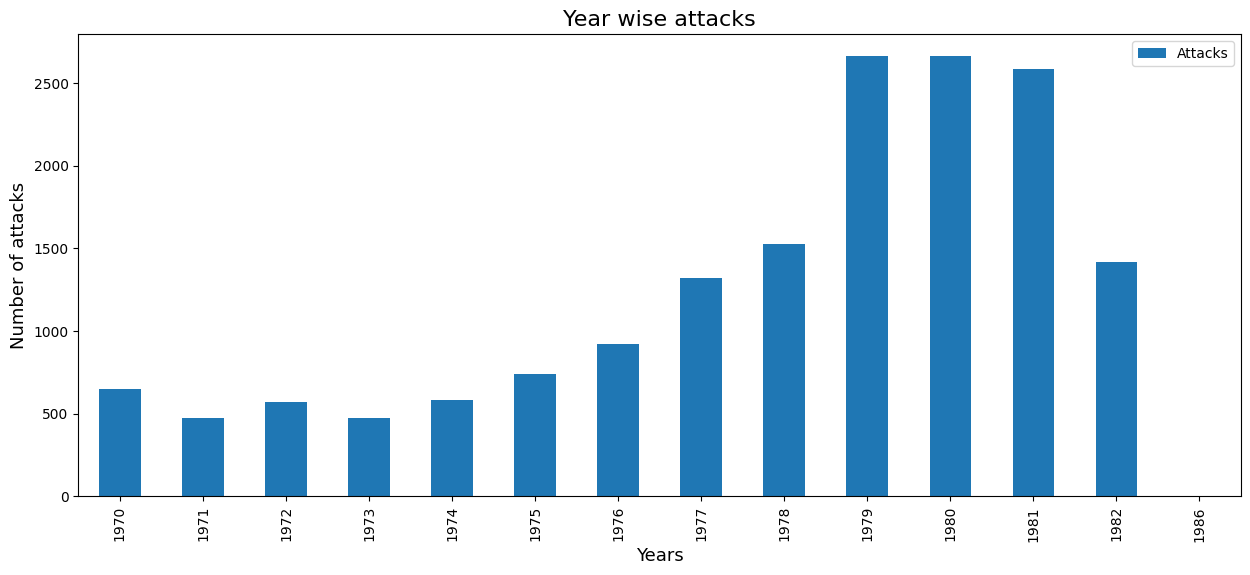

In [ ]:
Attacks.plot(kind="bar",figsize=(15,6),fontsize=10)
plt.title("Year wise attacks",fontsize=16)
plt.xlabel("Years",fontsize=13)
plt.ylabel("Number of attacks",fontsize= 13)
plt.show()

Most number of attacks in 2014.
Least number of attacks in 1971.

# Total number of Casualties(killed+wounded) in each year

In [ ]:
#Total casualities(killed+wounded) in each year
Casualties=df[["Year","Casualty"]].groupby("Year").sum()
Casualties.head()

Casualty
Year          
1970     386.0
1971     255.0
1972     975.0
1973     865.0
1974    1404.0

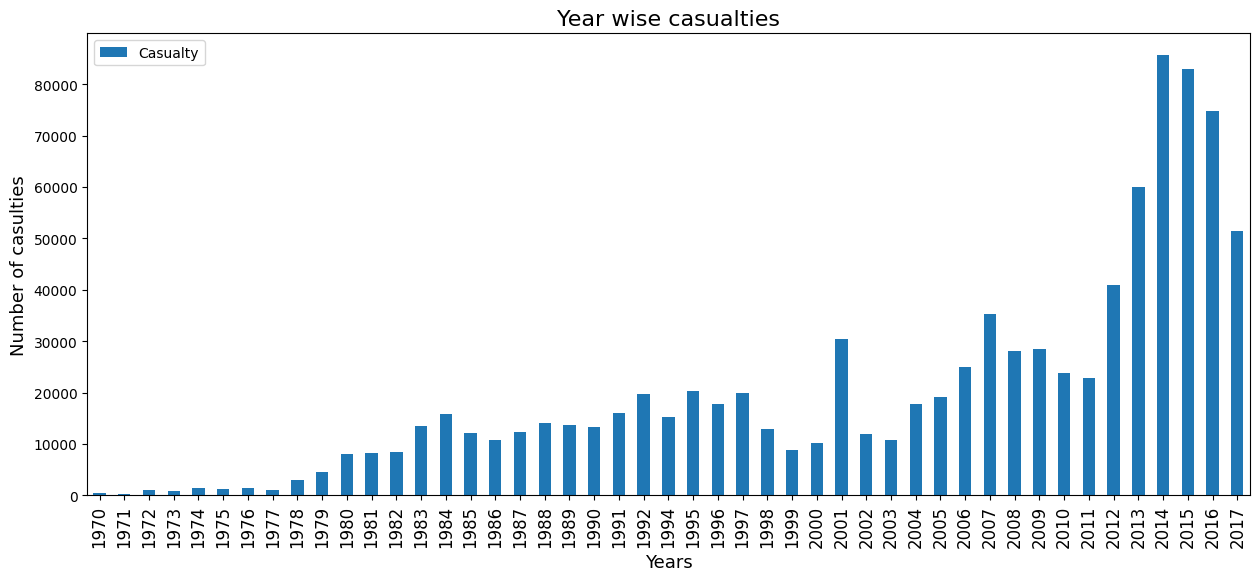

In [ ]:
Casualties.plot(kind="bar",figsize=(15,6),fontsize=10)
plt.title("Year wise casualties",fontsize=16)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of casulties",fontsize= 13)
plt.show()

Most number of casualties in 2014.
Least number of casualties in 1970.

# Total number of Killed in each Year

In [ ]:
#killed in each year
Kill=df[["Year","killed"]].groupby("Year").sum()
Kill.head()

killed
Year        
1970   174.0
1971   173.0
1972   566.0
1973   370.0
1974   539.0

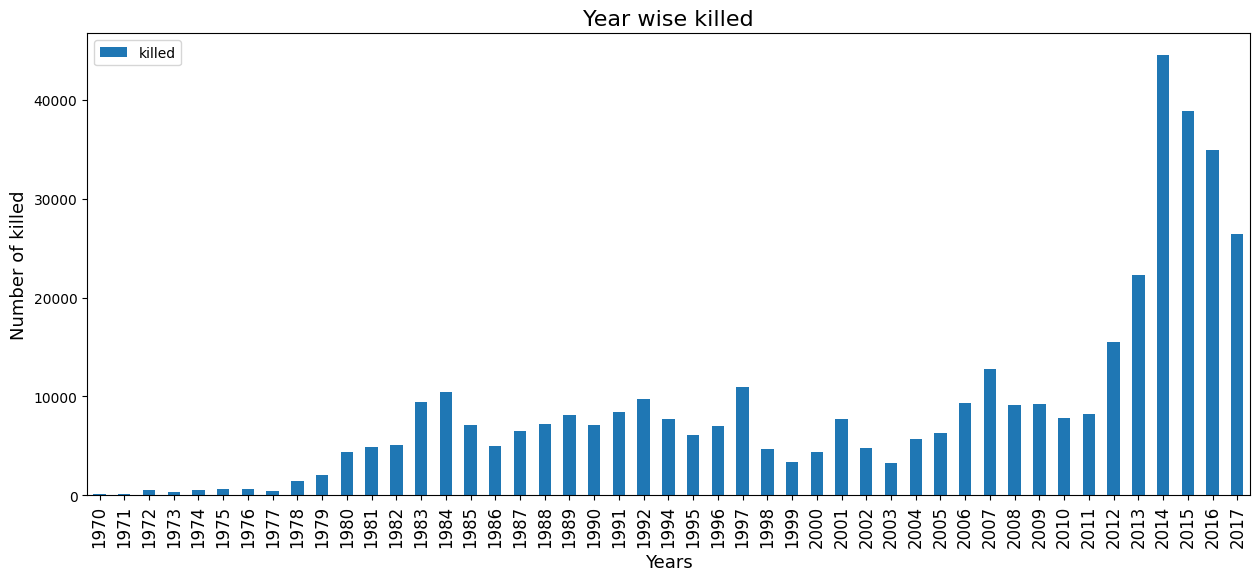

In [ ]:
Kill.plot(kind="bar",figsize=(15,6),fontsize=10)
plt.title("Year wise killed",fontsize=16)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of killed",fontsize= 13)
plt.show()

Most number of killed people in 2014.
Least number of killed people in 1970.

# Total number of wounded in each year

In [ ]:
#wounded in each year
Wound=df[["Year","Wounded"]].groupby("Year").sum()
Wound.head()

Wounded
Year         
1970    212.0
1971     82.0
1972    409.0
1973    495.0
1974    865.0

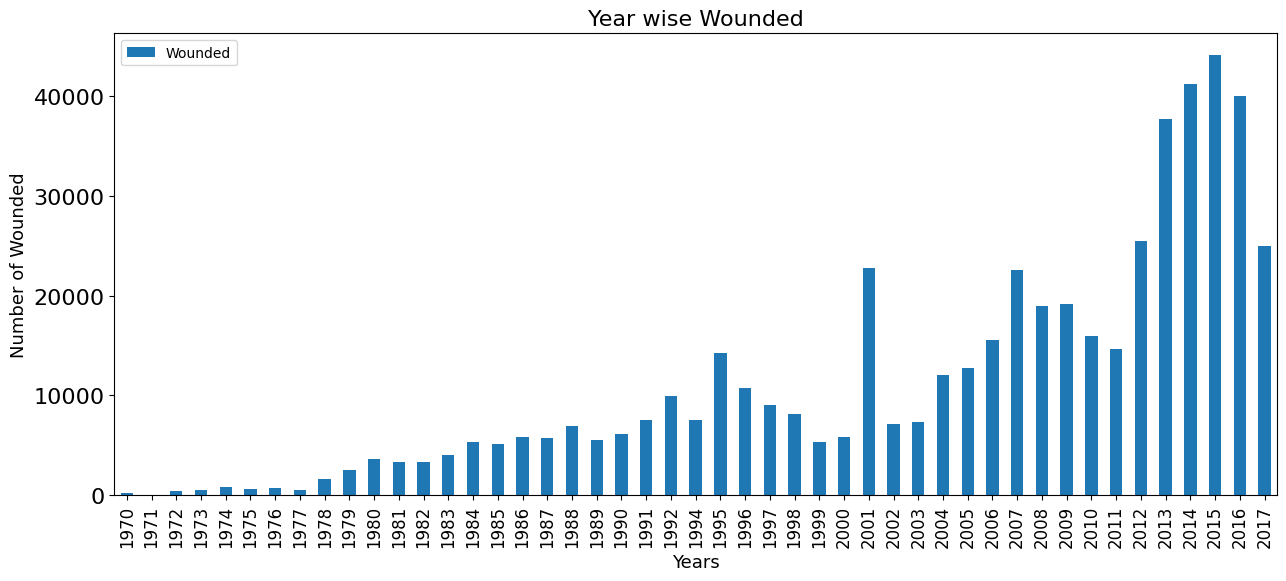

In [ ]:
Wound.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Year wise Wounded",fontsize=16)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Wounded",fontsize= 13)
plt.show()

Most number of Wounded people in 2015.
Least number of Wounded people in 1971


# Distribution of Terrorist Attacks over regions from 1970-2017

In [ ]:
#Distribution of terrorist attacks over regions from 1970-2017
Region_a=pd.crosstab(df.Year,df.Region)
Region_a.head()

Region  Australasia & Oceania  Central America & Caribbean  Central Asia  \
Year                                                                       
1970                        1                            7             0   
1971                        1                            5             0   
1972                        8                            3             0   
1973                        1                            6             0   
1974                        1                           11             0   

Region  East Asia  Eastern Europe  Middle East & North Africa  North America  \
Year                                                                           
1970            2              12                          28            472   
1971            1               5                          55            247   
1972            0               1                          53             73   
1973            2               1                          19             64   
1974            4               2                          42            111   

Region  South America  South Asia  Southeast Asia  Sub-Saharan Africa  \
Year                                                                    
1970               65           1              10                   3   
1971               24           0               6                   2   
1972               33           1              16                   4   
1973               83           1               2                   4   
1974               81           2               3                   7   

Region  Western Europe  
Year                    
1970                50  
1971               125  
1972               376  
1973               290  
1974               317

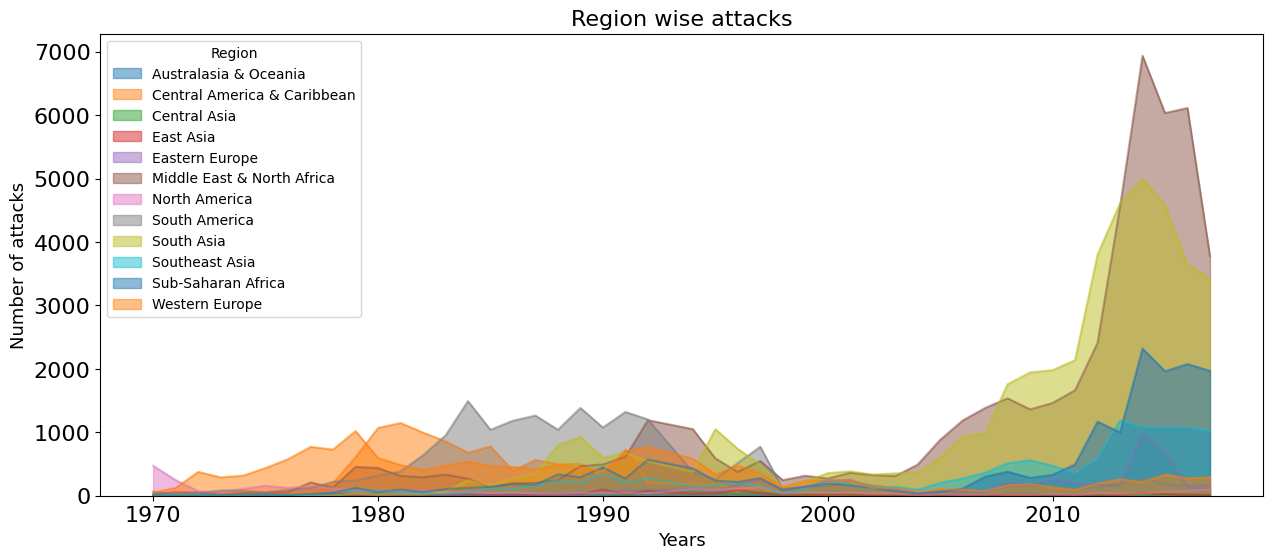

In [ ]:
Region_a.plot(kind="area",stacked=False,alpha=0.5,figsize=(15,6),fontsize=16)
plt.title("Region wise attacks",fontsize=16)
plt.xlabel("Years",fontsize=13)
plt.ylabel("Number of attacks",fontsize= 13)
plt.show()

In [ ]:
Region_t=Region_a.transpose()
Region_t["Total"]=Region_t.sum(axis=1)
x=Region_t["Total"].sort_values(ascending=False)
x

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

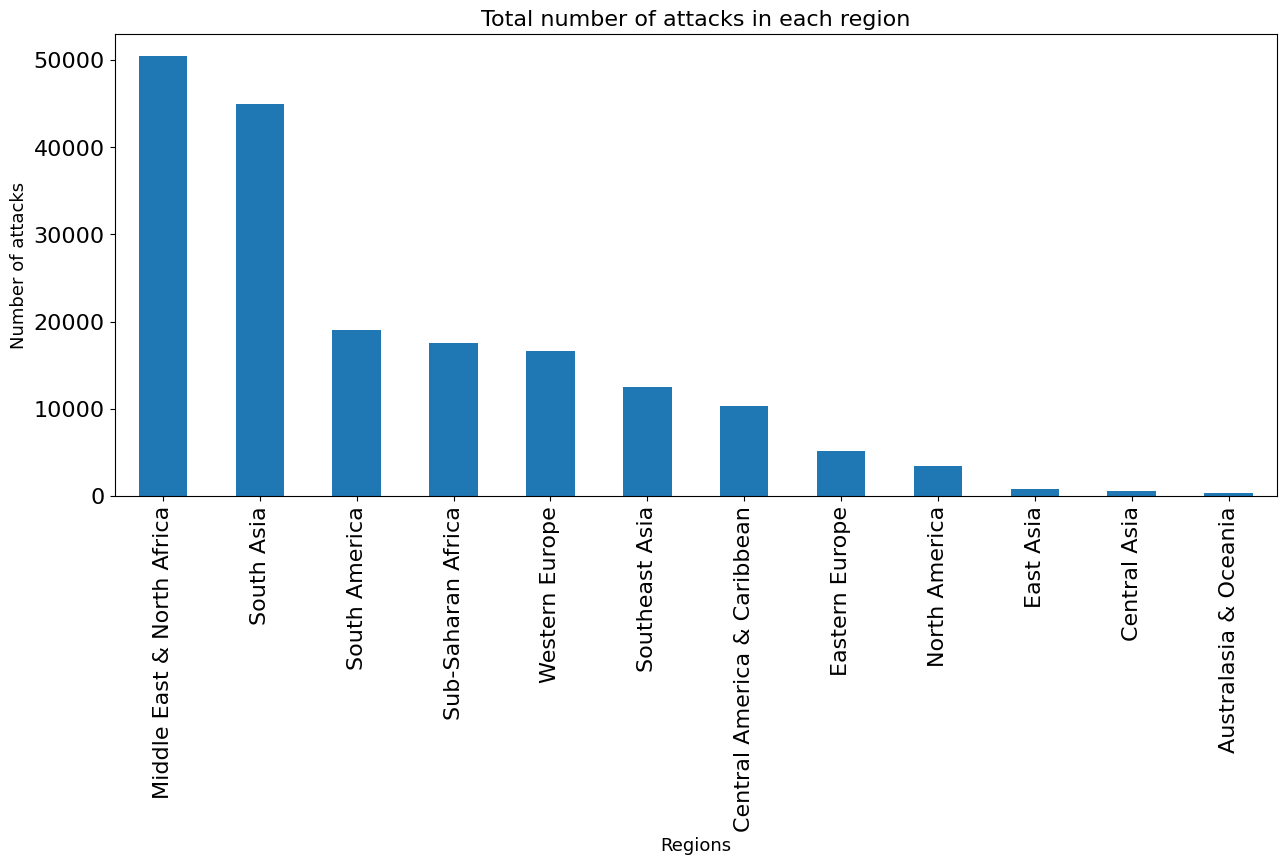

In [ ]:
x.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Total number of attacks in each region",fontsize=16)
plt.xlabel("Regions",fontsize=13)
plt.ylabel("Number of attacks",fontsize= 13)
plt.show()

Most number of attacks region:in Middle East & North Africa.
Least nummber of attacks region:in Australasia & Oceania.

# Region wise Casualties

In [ ]:
#Total casualties (killed+wounded) in each region
rc=df[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)
rc

Casualty
Region                               
Middle East & North Africa   351950.0
South Asia                   242679.0
Sub-Saharan Africa           131243.0
South America                 45553.0
Southeast Asia                41896.0
Central America & Caribbean   37699.0
North America                 26447.0
Western Europe                25026.0
Eastern Europe                19460.0
East Asia                     10365.0
Central Asia                   3009.0
Australasia & Oceania           410.0

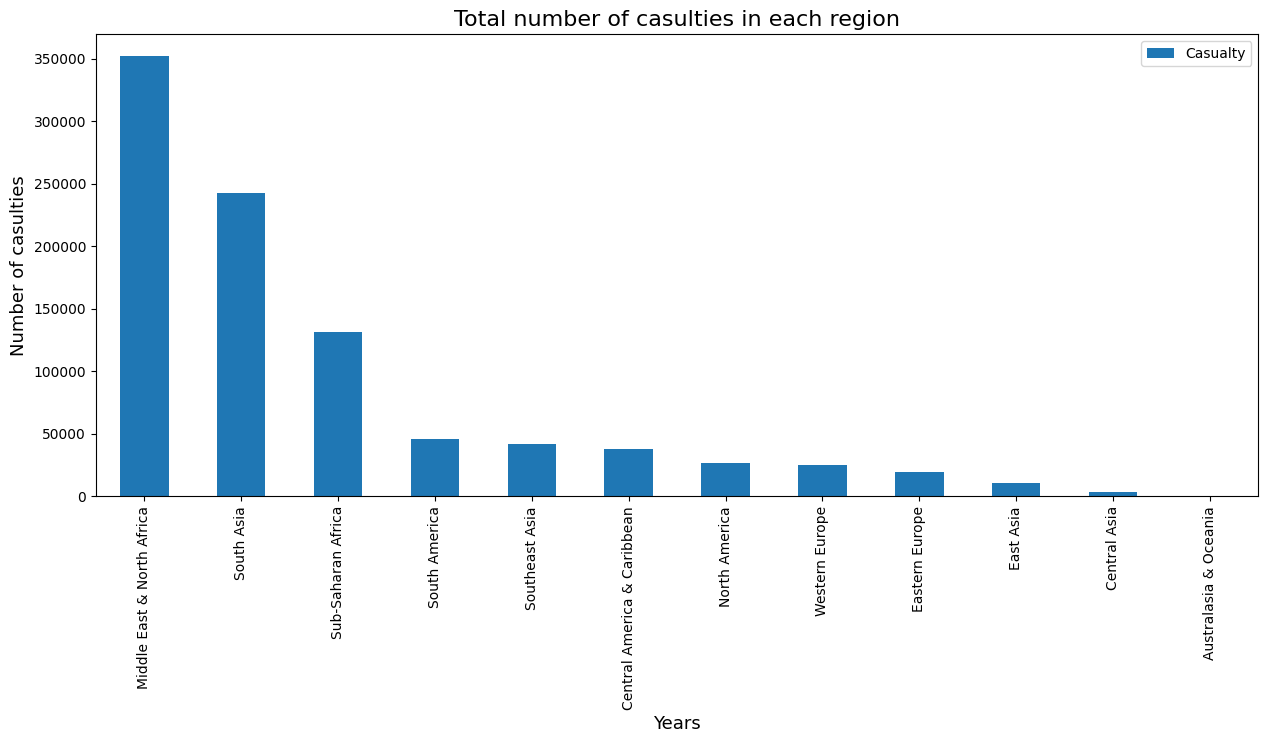

In [ ]:
rc.plot(kind="bar",figsize=(15,6))
plt.title("Total number of casulties in each region",fontsize=16)
plt.xlabel("Years",fontsize=13)
plt.ylabel("Number of casulties",fontsize= 13)
plt.show()

Most number of casualties region:in Middle East & North Africa.
Least number of casualties region:Australasia & Oceania

# Region wise Killed

In [ ]:
 #Total killed in each region
rk=df[["Region","killed"]].groupby("Region").sum().sort_values(by="killed",ascending=False)
rk

killed
Region                               
Middle East & North Africa   137642.0
South Asia                   101319.0
Sub-Saharan Africa            78386.0
South America                 28849.0
Central America & Caribbean   28708.0
Southeast Asia                15637.0
Eastern Europe                 7415.0
Western Europe                 6694.0
North America                  4916.0
East Asia                      1152.0
Central Asia                   1000.0
Australasia & Oceania           150.0

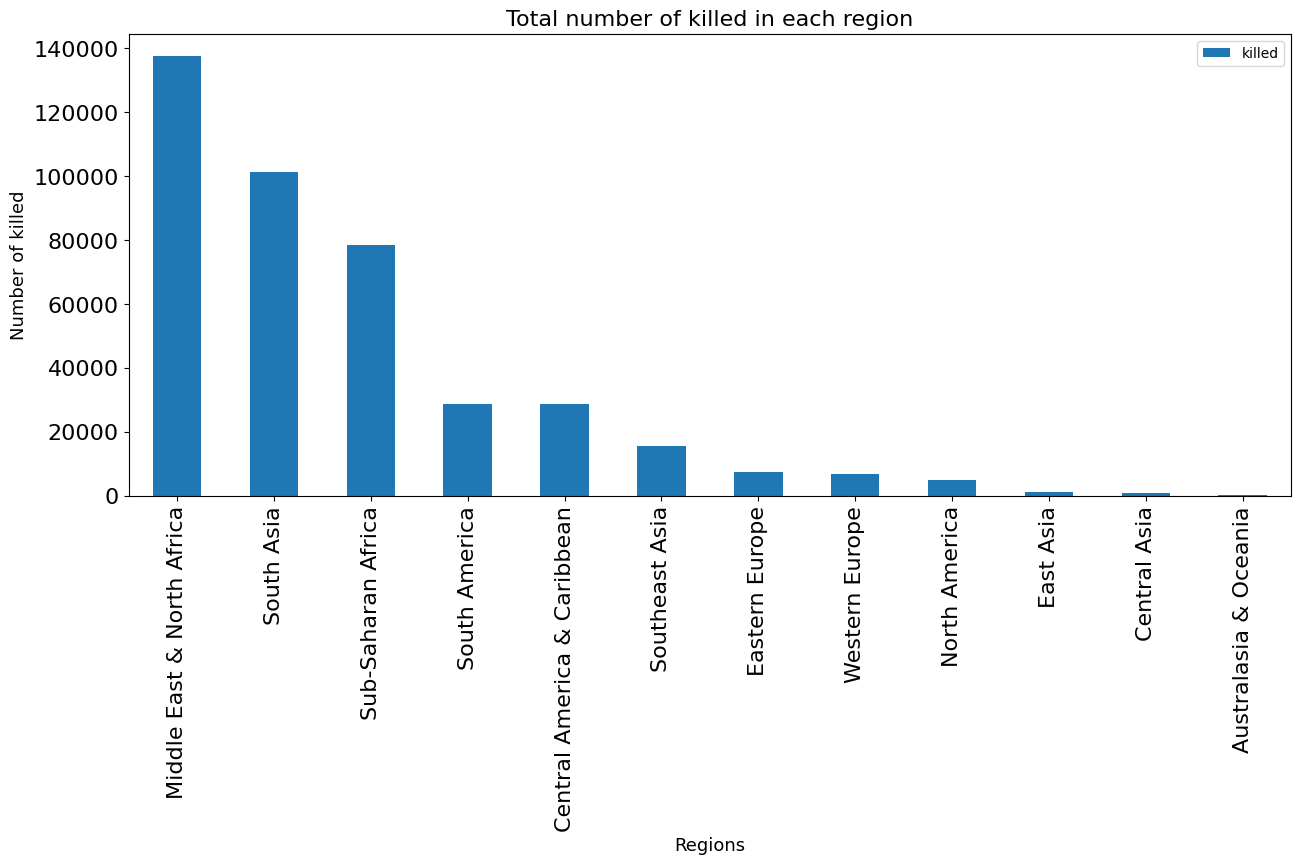

In [ ]:
rk.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Total number of killed in each region",fontsize=16)
plt.xlabel("Regions",fontsize=13)
plt.ylabel("Number of killed",fontsize= 13)
plt.show()

Most number of killed in region: Middle East & North Africa. Least number of killed in region:Australasia & Oceania

# Region wise Wounded

In [ ]:
rw=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
rw

Wounded
Region                               
Middle East & North Africa   214308.0
South Asia                   141360.0
Sub-Saharan Africa            52857.0
Southeast Asia                26259.0
North America                 21531.0
Western Europe                18332.0
South America                 16704.0
Eastern Europe                12045.0
East Asia                      9213.0
Central America & Caribbean    8991.0
Central Asia                   2009.0
Australasia & Oceania           260.0

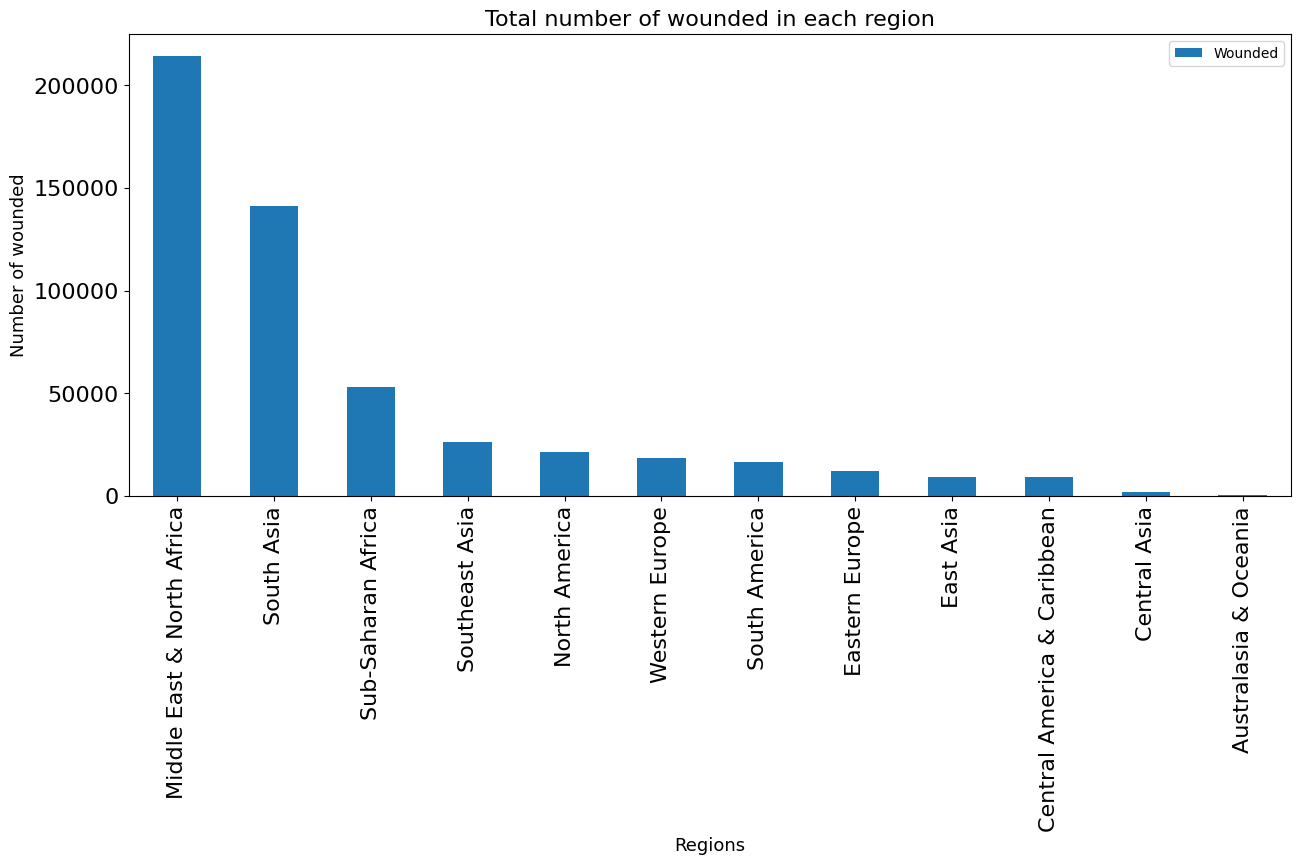

In [ ]:
rw.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Total number of wounded in each region",fontsize=16)
plt.xlabel("Regions",fontsize=13)
plt.ylabel("Number of wounded",fontsize= 13)
plt.show()

Most number of wounded in region:in Middle East & North Africa. Least number of wounded in region:Australasia & Oceania

# Country wise Attacks

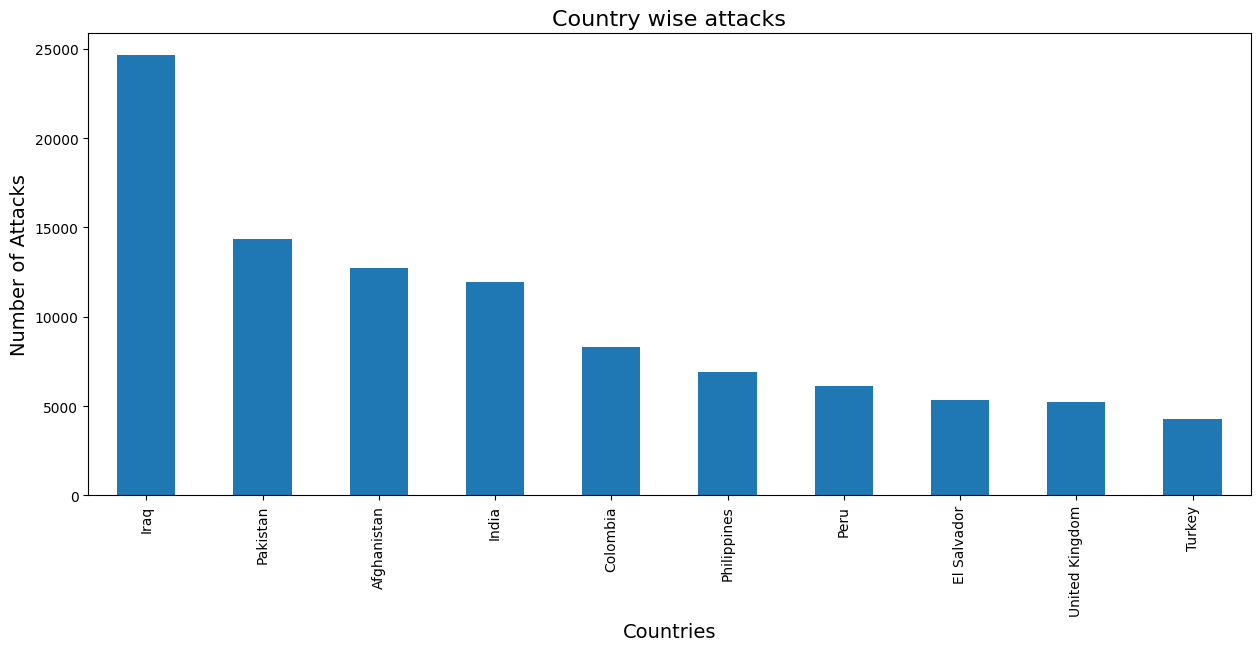

In [ ]:
Country_t=df["Country"].value_counts().head(10)
Country_t.plot(kind="bar",figsize=(15,6))
plt.title("Country wise attacks",fontsize=16)
plt.xlabel("Countries",fontsize=14)
plt.ylabel("Number of Attacks",fontsize= 14)
plt.show()

Most number of attacks:Iraq. Least number of attacks:Turkey

# Country wise Casualties

In [ ]:
cnc=df[["Country","Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False).head(20)
cnc

Casualty
Country                
Iraq           213279.0
Afghanistan     83661.0
Pakistan        65860.0
India           48321.0
Nigeria         32921.0
Sri Lanka       31091.0
Syria           29338.0
Colombia        25026.0
United States   24473.0
Philippines     22926.0
Algeria         20216.0
Somalia         19148.0
Yemen           18104.0
El Salvador     17115.0
Peru            16849.0
Turkey          16787.0
Lebanon         14965.0
Nicaragua       12329.0
Russia          11749.0
Thailand        10560.0

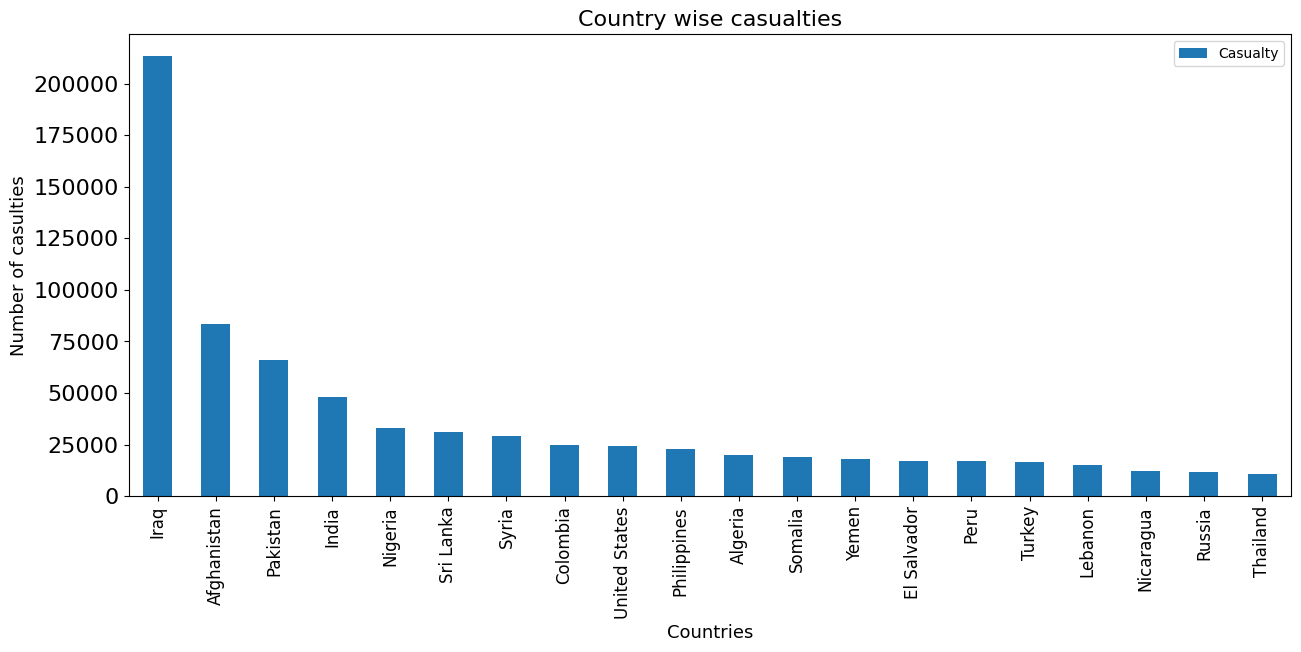

In [ ]:
cnc.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Country wise casualties",fontsize=16)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of casulties",fontsize= 13)
plt.show()

Most number of casualties:Iraq. Least number of casualties:Pillippines

# Country wise Killed

In [ ]:
cnk=df[["Country","killed"]].groupby("Country").sum().sort_values(by="killed",ascending=False).head(20)
cnk

killed
Country                                  
Iraq                              78589.0
Afghanistan                       39384.0
Pakistan                          23822.0
Nigeria                           22682.0
India                             19341.0
Sri Lanka                         15530.0
Syria                             15229.0
Colombia                          14698.0
Peru                              12771.0
El Salvador                       12053.0
Algeria                           11066.0
Nicaragua                         10598.0
Somalia                           10273.0
Philippines                        9559.0
Yemen                              8776.0
Turkey                             6888.0
Guatemala                          5167.0
Russia                             4308.0
Burundi                            4205.0
Democratic Republic of the Congo   4069.0

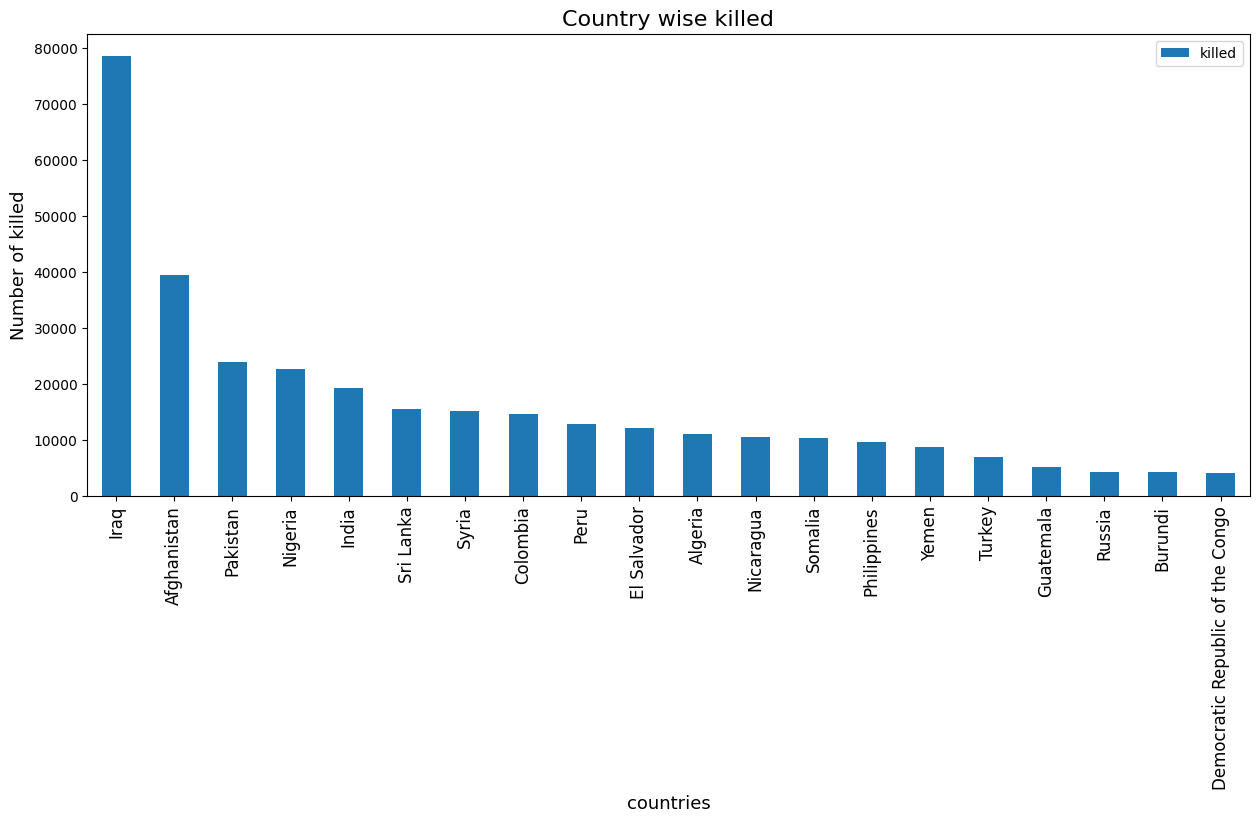

In [ ]:
cnk.plot(kind="bar",figsize=(15,6),fontsize=10)
plt.title("Country wise killed",fontsize=16)
plt.xlabel("countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of killed",fontsize= 13)
plt.show()

Most number of people killed:Iraq. Least number of people killed:El Salvador

# Country wise Wounded

In [ ]:
cnw=df[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False).head(20)
cnw

Wounded
Country                
Iraq           134690.0
Afghanistan     44277.0
Pakistan        42038.0
India           28980.0
United States   20702.0
Sri Lanka       15561.0
Syria           14109.0
Philippines     13367.0
Lebanon         10904.0
Colombia        10328.0
Nigeria         10239.0
Turkey           9899.0
Yemen            9328.0
Algeria          9150.0
Somalia          8875.0
Bangladesh       8225.0
Israel           7946.0
Thailand         7818.0
Russia           7441.0
Japan            6998.0

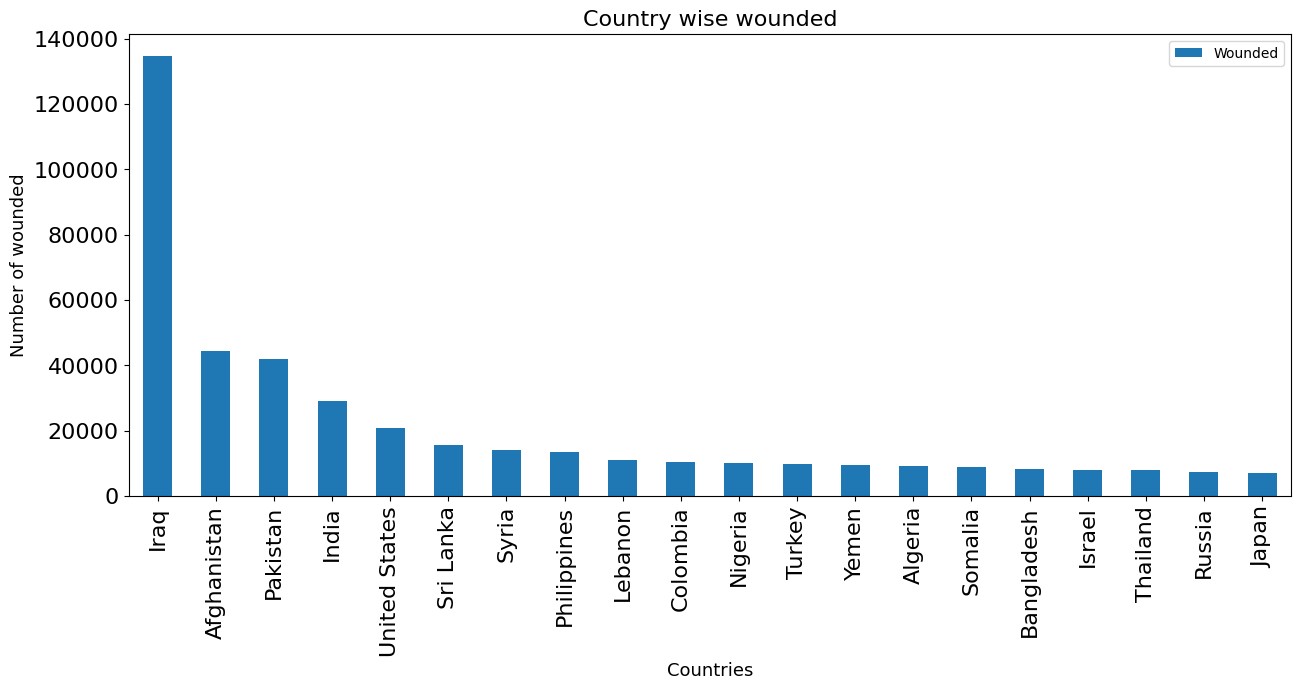

In [ ]:
cnw.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Country wise wounded",fontsize=16)
plt.xlabel("Countries",fontsize=13)
plt.ylabel("Number of wounded",fontsize= 13)
plt.show()

Most number of wounded:Iraq. Least number of wounded:Japan

# Total Casualties (killed+wounded) in each City

In [ ]:
#Total casualties (killed+wounded) in each city
cc=df[["City","Casualty"]].groupby("City").sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(20)
cc

Casualty
City                   
Baghdad         77876.0
New York City   19619.0
Mosul           12927.0
Karachi          9376.0
Mogadishu        8868.0
Kabul            8466.0
Beirut           7257.0
Kirkuk           6636.0
Colombo          5906.0
Aleppo           5748.0
Quetta           5590.0
Peshawar         5572.0
Tokyo            5562.0
Nairobi          5472.0
Baqubah          5119.0
Damascus         4528.0
Ramadi           4499.0
Tikrit           4453.0
Lahore           4082.0
Algiers          4047.0

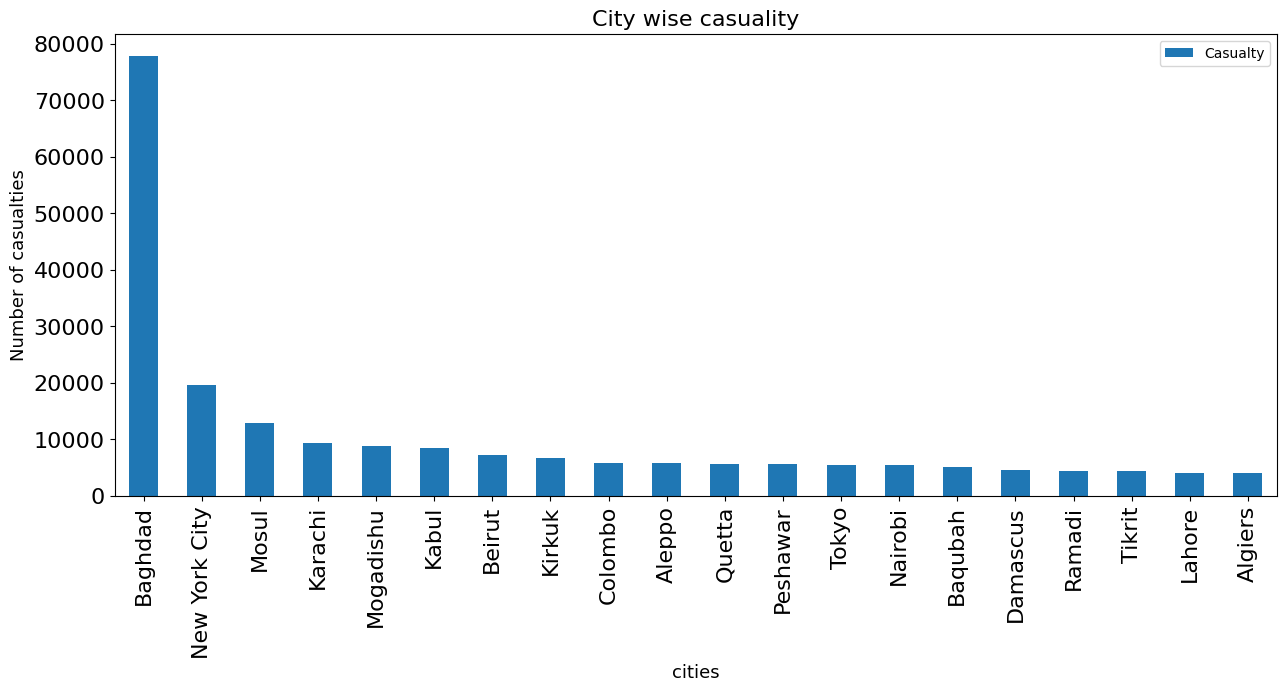

In [ ]:
cc.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("City wise casuality",fontsize=16)
plt.xlabel("cities",fontsize=13)
plt.ylabel("Number of casualties",fontsize= 13)
plt.show()

Most number of casualties:Baghbad. Least number of casualties:Algiers

# City wise Killed

In [ ]:
ck=df[["City","killed"]].groupby("City").sum().sort_values(by="killed",ascending=False).drop("Unknown").head(20)
ck

killed
City                  
Baghdad        21151.0
Mosul           7140.0
Mogadishu       3913.0
Karachi         3688.0
New York City   2838.0
Tikrit          2679.0
Kabul           2493.0
Ramadi          2313.0
Maiduguri       2235.0
Aleppo          2125.0
Beirut          1916.0
Fallujah        1837.0
Baqubah         1779.0
Quetta          1748.0
Peshawar        1634.0
Kirkuk          1628.0
Colombo         1386.0
Belfast         1354.0
Damascus        1344.0
Tal Afar        1301.0

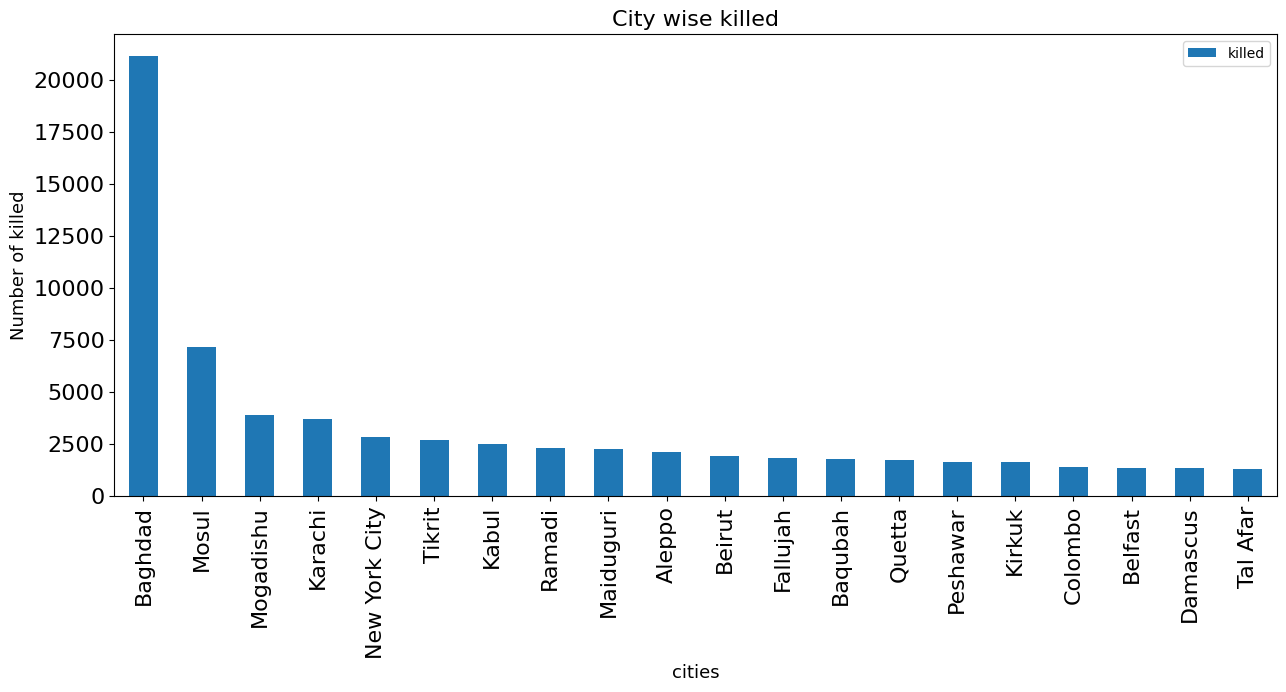

In [ ]:
ck.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("City wise killed",fontsize=16)
plt.xlabel("cities",fontsize=13)
plt.ylabel("Number of killed",fontsize= 13)
plt.show()


Most number of casualties:Baghbad. Least number of casualties:Tal Afar

# City wise Wounded

In [ ]:
cw=df[["City","Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(20)
cw

Wounded
City                  
Baghdad        56725.0
New York City  16781.0
Kabul           5973.0
Mosul           5787.0
Karachi         5688.0
Tokyo           5542.0
Beirut          5341.0
Nairobi         5024.0
Kirkuk          5008.0
Mogadishu       4955.0
Colombo         4520.0
Peshawar        3938.0
Quetta          3842.0
Aleppo          3623.0
Baqubah         3340.0
Jerusalem       3235.0
Damascus        3184.0
Lahore          3171.0
Algiers         2979.0
Hillah          2864.0

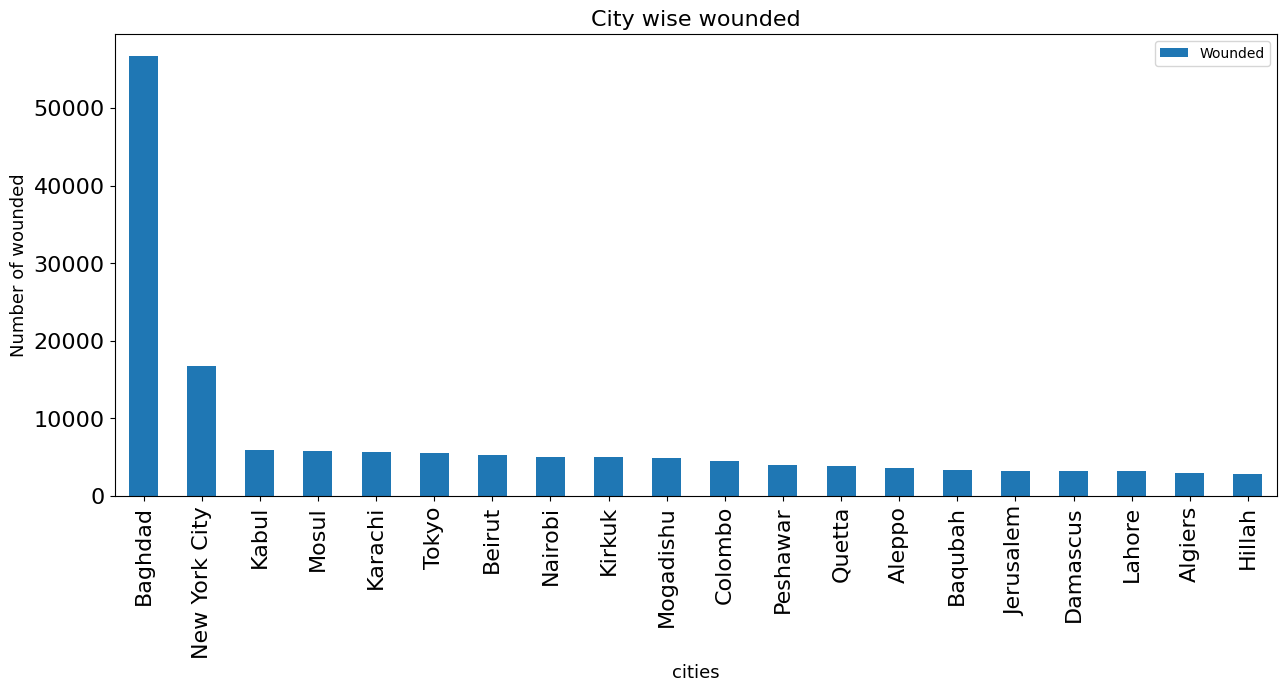

In [ ]:
cw.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("City wise wounded",fontsize=16)
plt.xlabel("cities",fontsize=13)
plt.ylabel("Number of wounded",fontsize= 13)
plt.show()


Most number of casualties:Baghbad. Least number of casualties:Hillah

# Group wise Attacks

In [ ]:
#number of attacks by each group
group=df["Group Name"].value_counts().drop("Unknown").head(20)
group

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
National Liberation Army of Colombia (ELN)          1561
Tehrik-i-Taliban Pakistan (TTP)                     1351
Palestinians                                        1125
Houthi extremists (Ansar Allah)

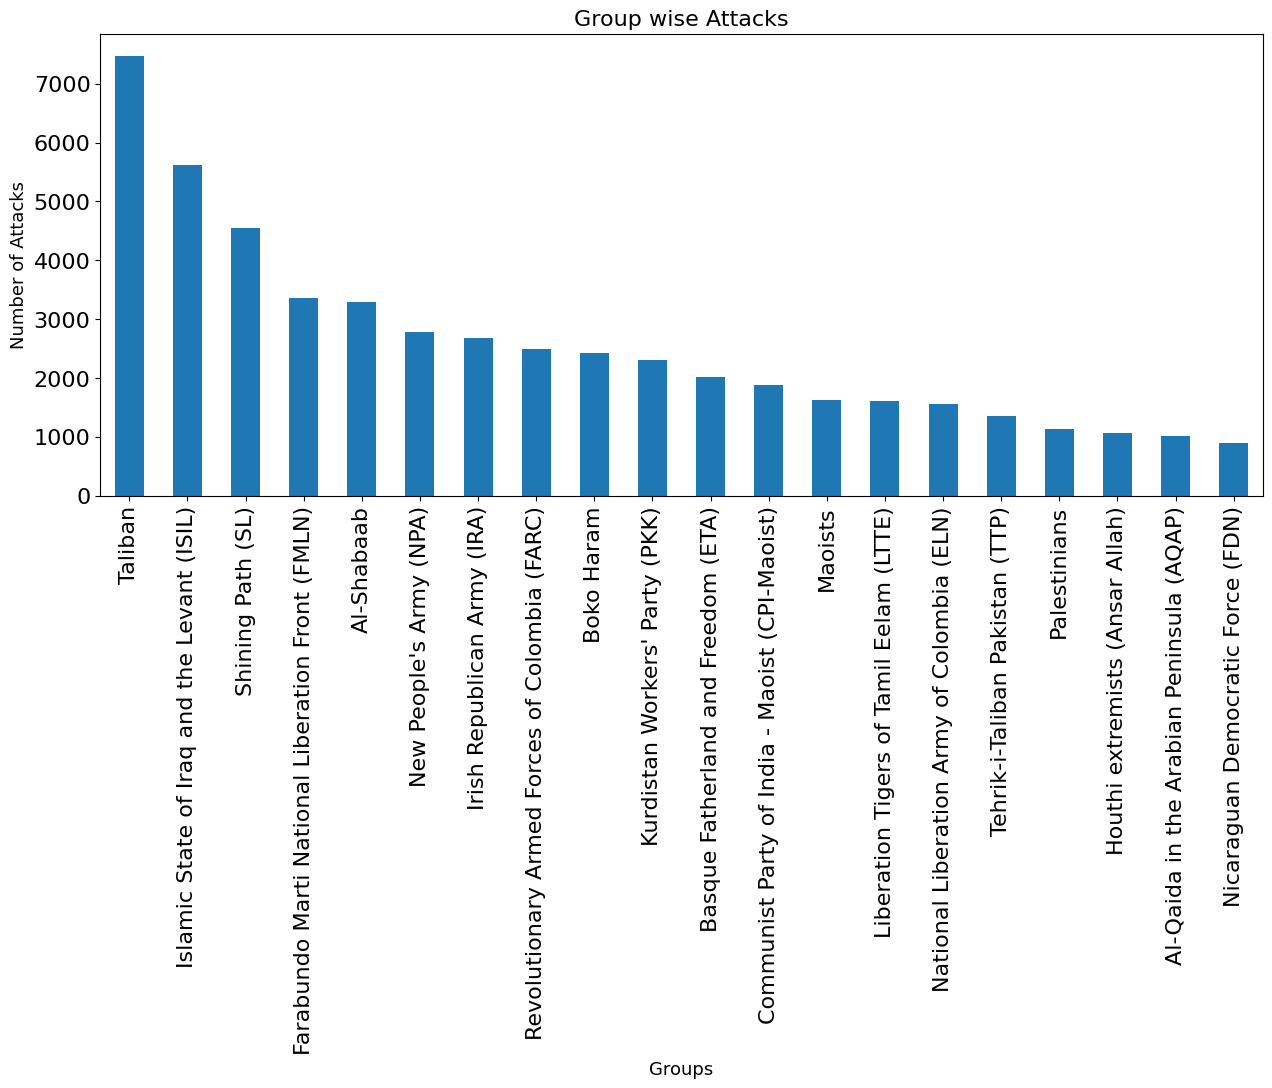

In [ ]:
group.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Group wise Attacks",fontsize=16)
plt.xlabel("Groups",fontsize=13)
plt.ylabel("Number of Attacks",fontsize= 13)
plt.show()


Most number of casualties:Taliban. Least number of casualties:Nicaraguan Democratic Force (FDN)

# Group wise Casualties

In [ ]:
gc=df[["Group Name","Casualty"]].groupby("Group Name").sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(20)
gc

Casualty
Group Name                                                
Islamic State of Iraq and the Levant (ISIL)        69595.0
Taliban                                            57342.0
Boko Haram                                         29801.0
Al-Qaida                                           28372.0
Liberation Tigers of Tamil Eelam (LTTE)            22020.0
Al-Shabaab                                         16954.0
Tehrik-i-Taliban Pakistan (TTP)                    15574.0
Al-Qaida in Iraq                                   14724.0
Shining Path (SL)                                  14632.0
Farabundo Marti National Liberation Front (FMLN)   12130.0
Revolutionary Armed Forces of Colombia (FARC)      10015.0
Kurdistan Workers' Party (PKK)                      9863.0
New People's Army (NPA)                             7719.0
Nicaraguan Democratic Force (FDN)                   7396.0
Al-Qaida in the Arabian Peninsula (AQAP)            6650.0
Houthi extremists (Ansar Allah)                     6484.0
Islamic State of Iraq (ISI)                         6215.0
Aum Shinri Kyo                                      6024.0
Irish Republican Army (IRA)                         5462.0
Al-Nusrah Front                                     5258.0

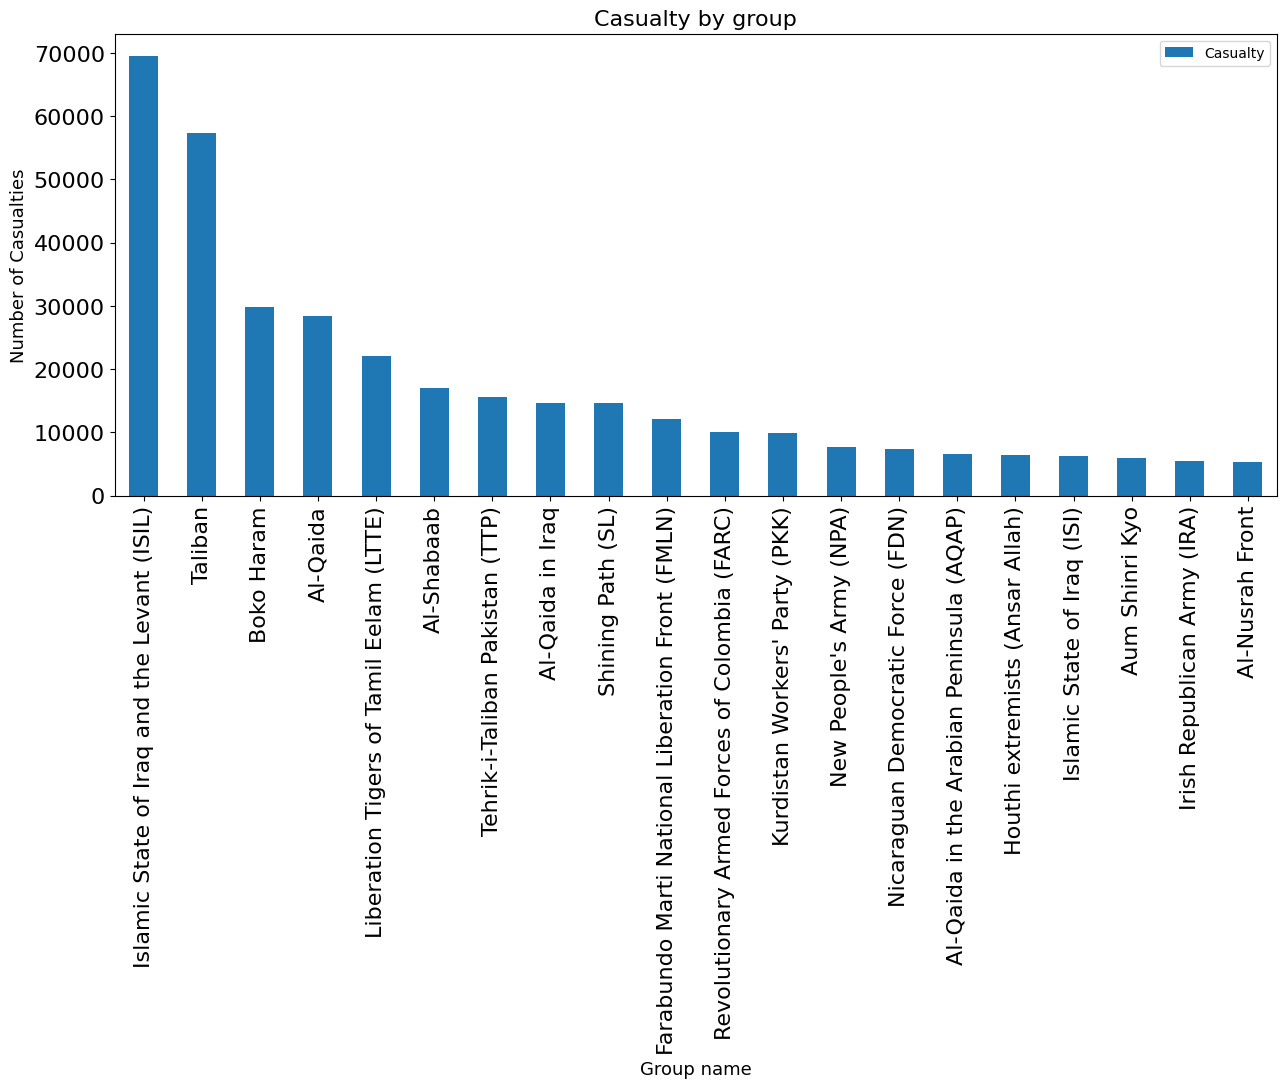

In [ ]:
gc.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Casualty by group",fontsize=16)
plt.xlabel("Group name",fontsize=13)
plt.ylabel("Number of Casualties",fontsize= 13)
plt.show()


Most number of casualties:Islamic State of Iraq and the Levant (ISIL). Least number of casualties:Al-Nusrah Front

# Group wise Killed

In [ ]:
#Total killed by each group
gk=df[["Group Name","killed"]].groupby("Group Name").sum().sort_values(by="killed",ascending=False).drop("Unknown").head(20)
gk

killed
Group Name                                               
Islamic State of Iraq and the Levant (ISIL)       38923.0
Taliban                                           29410.0
Boko Haram                                        20328.0
Shining Path (SL)                                 11601.0
Liberation Tigers of Tamil Eelam (LTTE)           10989.0
Al-Shabaab                                         9330.0
Farabundo Marti National Liberation Front (FMLN)   8065.0
Nicaraguan Democratic Force (FDN)                  6662.0
Tehrik-i-Taliban Pakistan (TTP)                    6042.0
Revolutionary Armed Forces of Colombia (FARC)      5661.0
Kurdistan Workers' Party (PKK)                     4955.0
New People's Army (NPA)                            4386.0
Al-Qaida in Iraq                                   4381.0
Hutu extremists                                    4102.0
Al-Qaida                                           3860.0
Al-Qaida in the Arabian Peninsula (AQAP)           3565.0
Lord's Resistance Army (LRA)                       3123.0
Fulani extremists                                  3083.0
Houthi extremists (Ansar Allah)                    3050.0
Al-Nusrah Front                                    2978.0

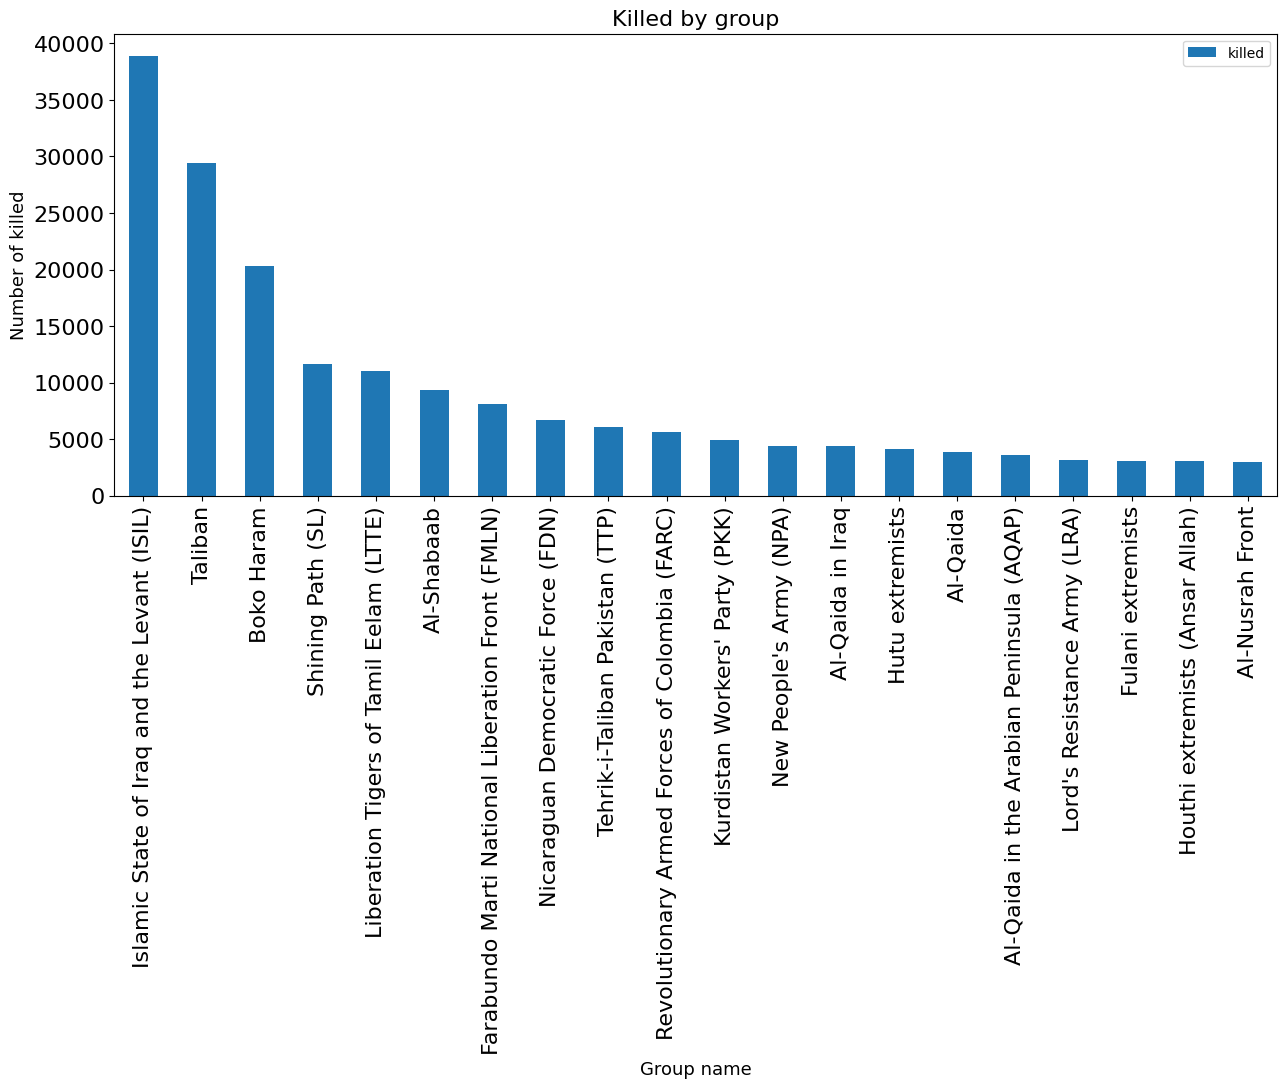

In [ ]:
gk.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Killed by group",fontsize=16)
plt.xlabel("Group name",fontsize=13)
plt.ylabel("Number of killed",fontsize= 13)
plt.show()

# Group wise wounded

In [ ]:
#total wounded by each group
gw=df[["Group Name","Wounded"]].groupby("Group Name").sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(20)
gw

Wounded
Group Name                                               
Islamic State of Iraq and the Levant (ISIL)       30672.0
Taliban                                           27932.0
Al-Qaida                                          24512.0
Liberation Tigers of Tamil Eelam (LTTE)           11031.0
Al-Qaida in Iraq                                  10343.0
Tehrik-i-Taliban Pakistan (TTP)                    9532.0
Boko Haram                                         9473.0
Al-Shabaab                                         7624.0
Aum Shinri Kyo                                     6003.0
Kurdistan Workers' Party (PKK)                     4908.0
Islamic State of Iraq (ISI)                        4489.0
Revolutionary Armed Forces of Colombia (FARC)      4354.0
Farabundo Marti National Liberation Front (FMLN)   4065.0
Irish Republican Army (IRA)                        3658.0
Houthi extremists (Ansar Allah)                    3434.0
New People's Army (NPA)                            3333.0
Hamas (Islamic Resistance Movement)                3142.0
Al-Qaida in the Arabian Peninsula (AQAP)           3085.0
Shining Path (SL)                                  3031.0
Khorasan Chapter of the Islamic State              2905.0

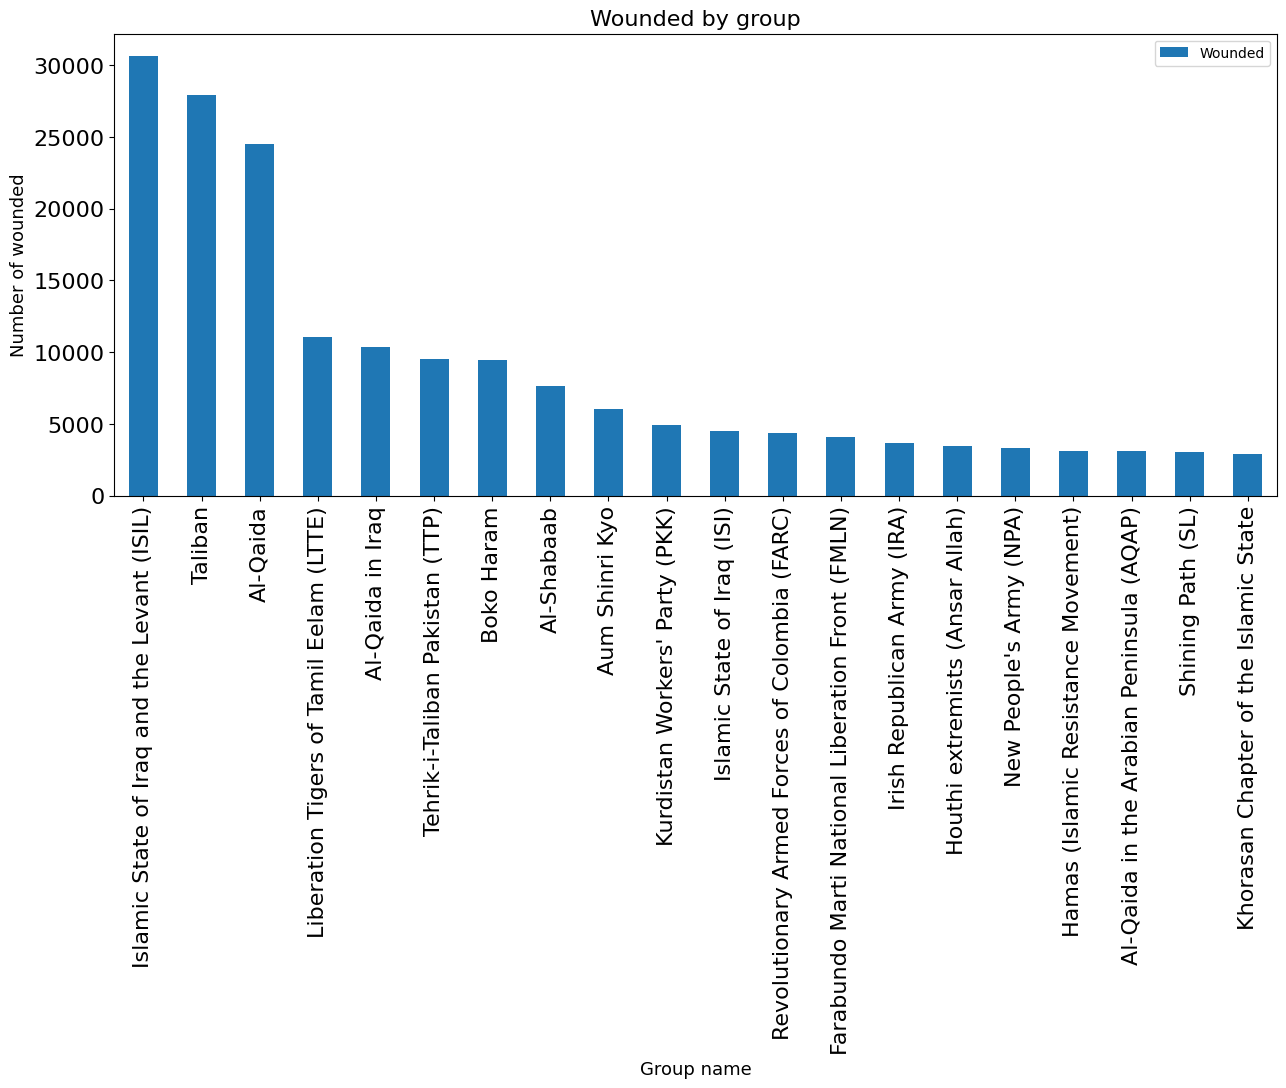

In [ ]:
gw.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Wounded by group",fontsize=16)
plt.xlabel("Group name",fontsize=13)
plt.ylabel("Number of wounded",fontsize= 13)
plt.show()

# Types of Attacks

In [ ]:
Attack_type=df["AttackType"].value_counts()
Attack_type

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

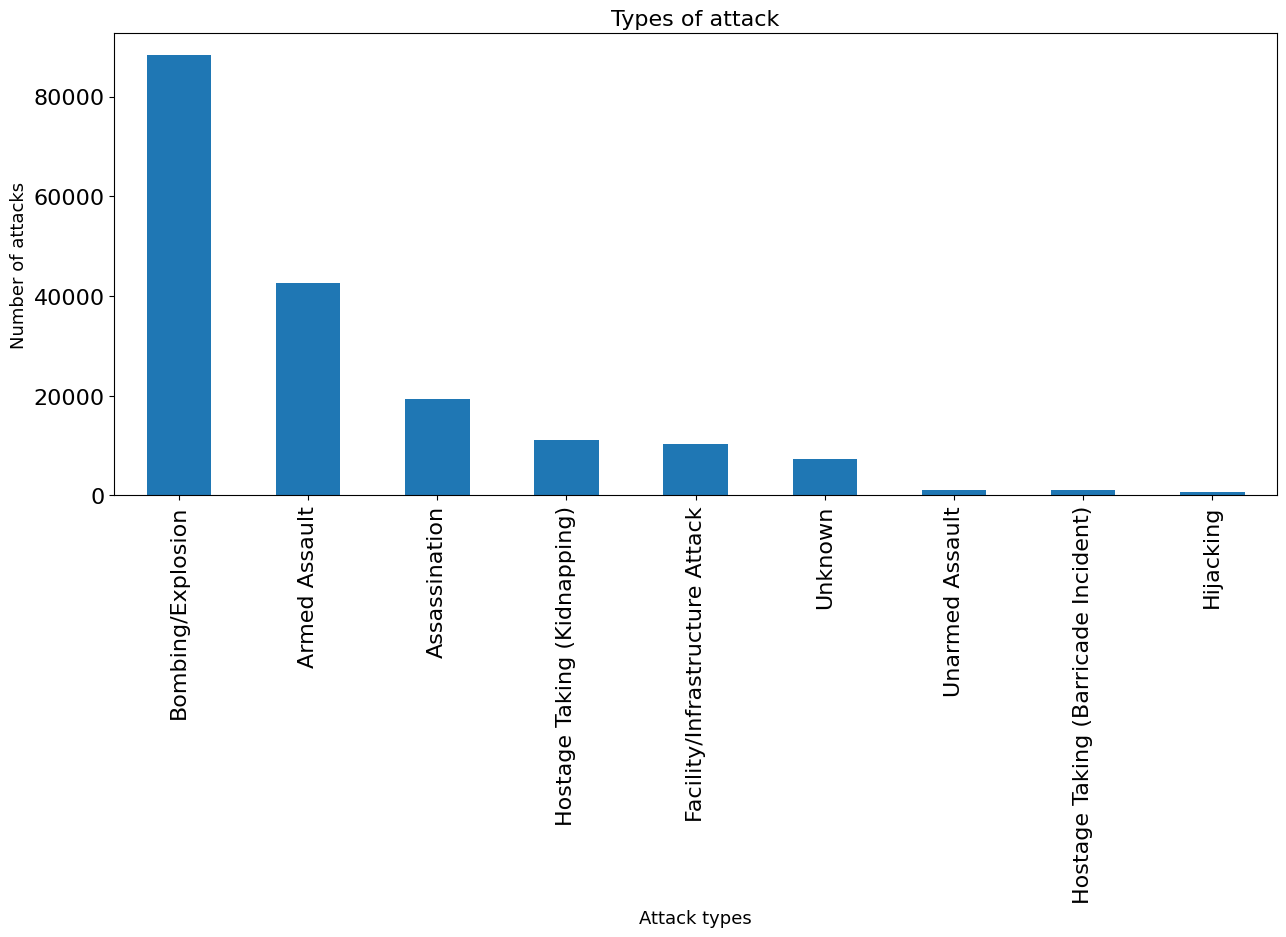

In [ ]:
Attack_type.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Types of attack",fontsize=16)
plt.xlabel("Attack types",fontsize=13)
plt.ylabel("Number of attacks",fontsize= 13)
plt.show()

# Type wise Casualties

In [ ]:
ac=df[["AttackType","Casualty"]].groupby("AttackType").sum().sort_values(by="Casualty",ascending=False)
ac

Casualty
AttackType                                   
Bombing/Explosion                    530007.0
Armed Assault                        237663.0
Unknown                               47106.0
Assassination                         38807.0
Hostage Taking (Kidnapping)           30677.0
Hijacking                             20719.0
Unarmed Assault                       14907.0
Hostage Taking (Barricade Incident)    8444.0
Facility/Infrastructure Attack         7407.0

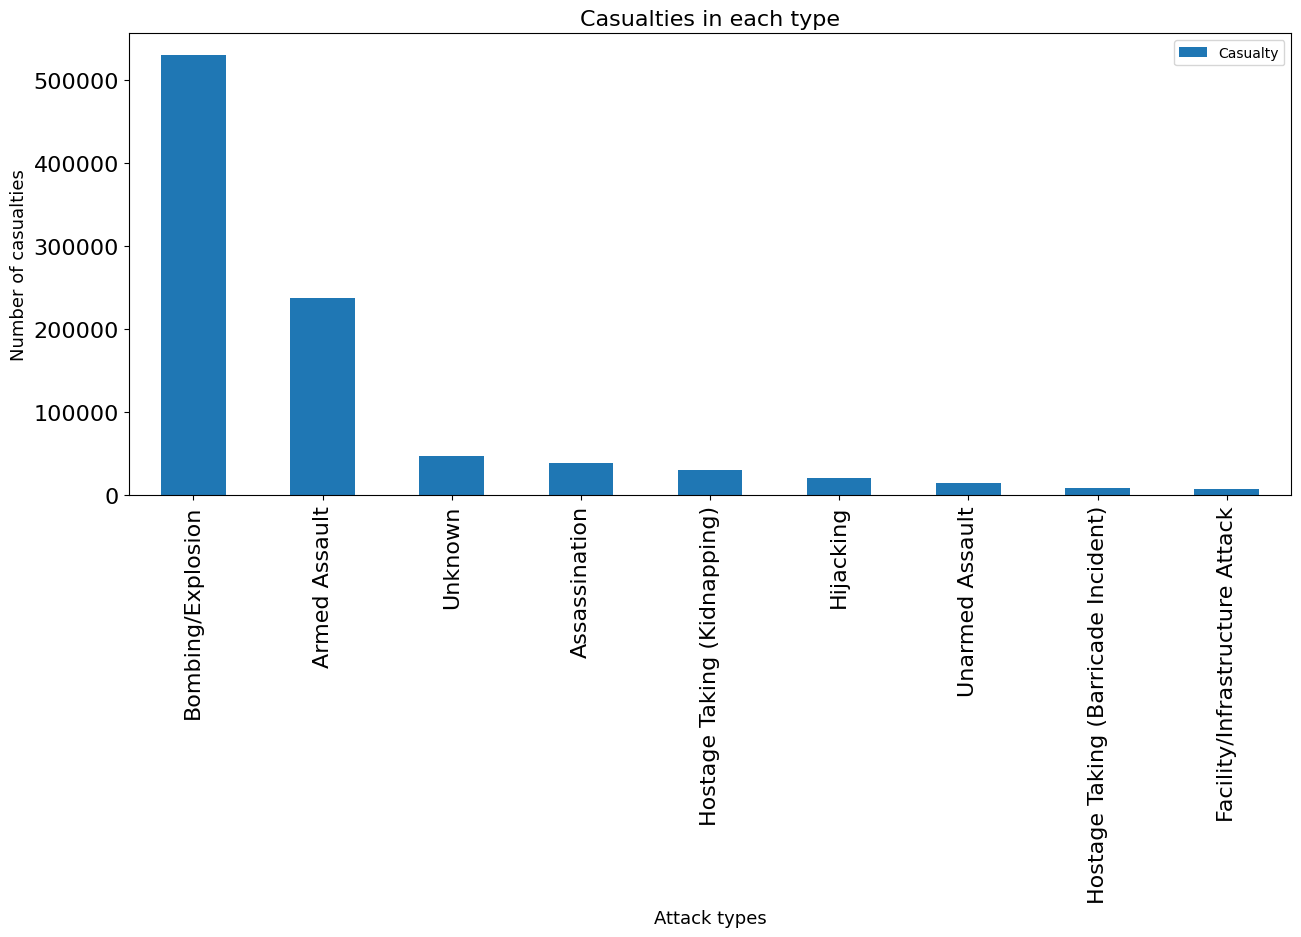

In [ ]:
ac.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Casualties in each type",fontsize=16)
plt.xlabel("Attack types",fontsize=13)
plt.ylabel("Number of casualties",fontsize= 13)
plt.show()

# Type wise Killed

In [ ]:
ak=df[["AttackType","killed"]].groupby("AttackType").sum().sort_values(by="killed",ascending=False)
ak

killed
AttackType                                 
Armed Assault                        9155.0
Bombing/Explosion                    4313.0
Assassination                        3560.0
Unknown                               959.0
Facility/Infrastructure Attack        585.0
Hostage Taking (Kidnapping)           362.0
Hostage Taking (Barricade Incident)   232.0
Hijacking                             184.0
Unarmed Assault                        17.0

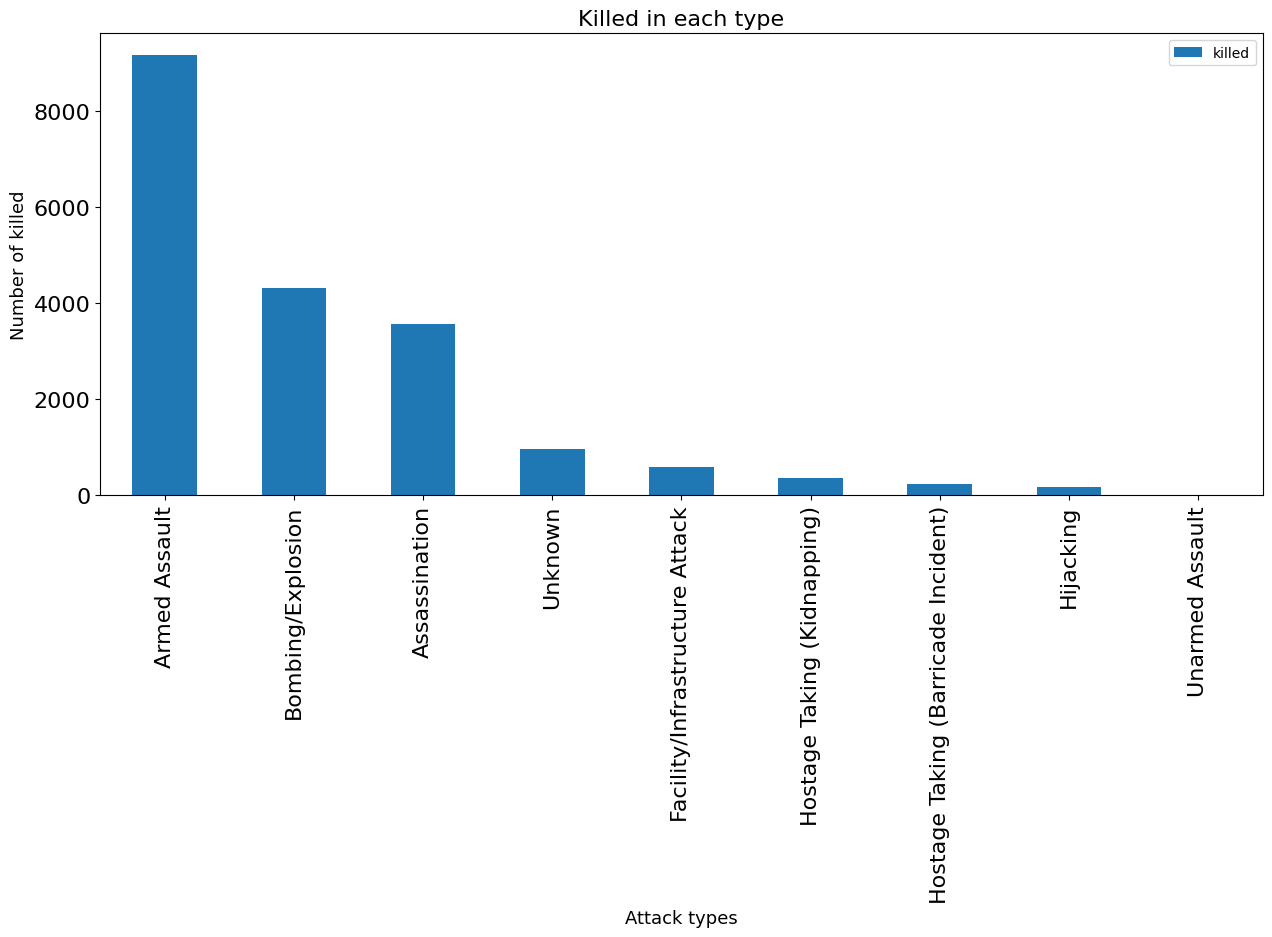

In [ ]:
ak.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Killed in each type",fontsize=16)
plt.xlabel("Attack types",fontsize=13)
plt.ylabel("Number of killed",fontsize= 13)
plt.show()

# Type wise Wounded

In [ ]:
aw=df[["AttackType","Wounded"]].groupby("AttackType").sum().sort_values(by="Wounded",ascending=False)
aw

Wounded
AttackType                                   
Bombing/Explosion                    372686.0
Armed Assault                         77366.0
Hijacking                             17001.0
Unknown                               14725.0
Unarmed Assault                       14027.0
Assassination                         13887.0
Hostage Taking (Kidnapping)            6446.0
Hostage Taking (Barricade Incident)    3966.0
Facility/Infrastructure Attack         3765.0

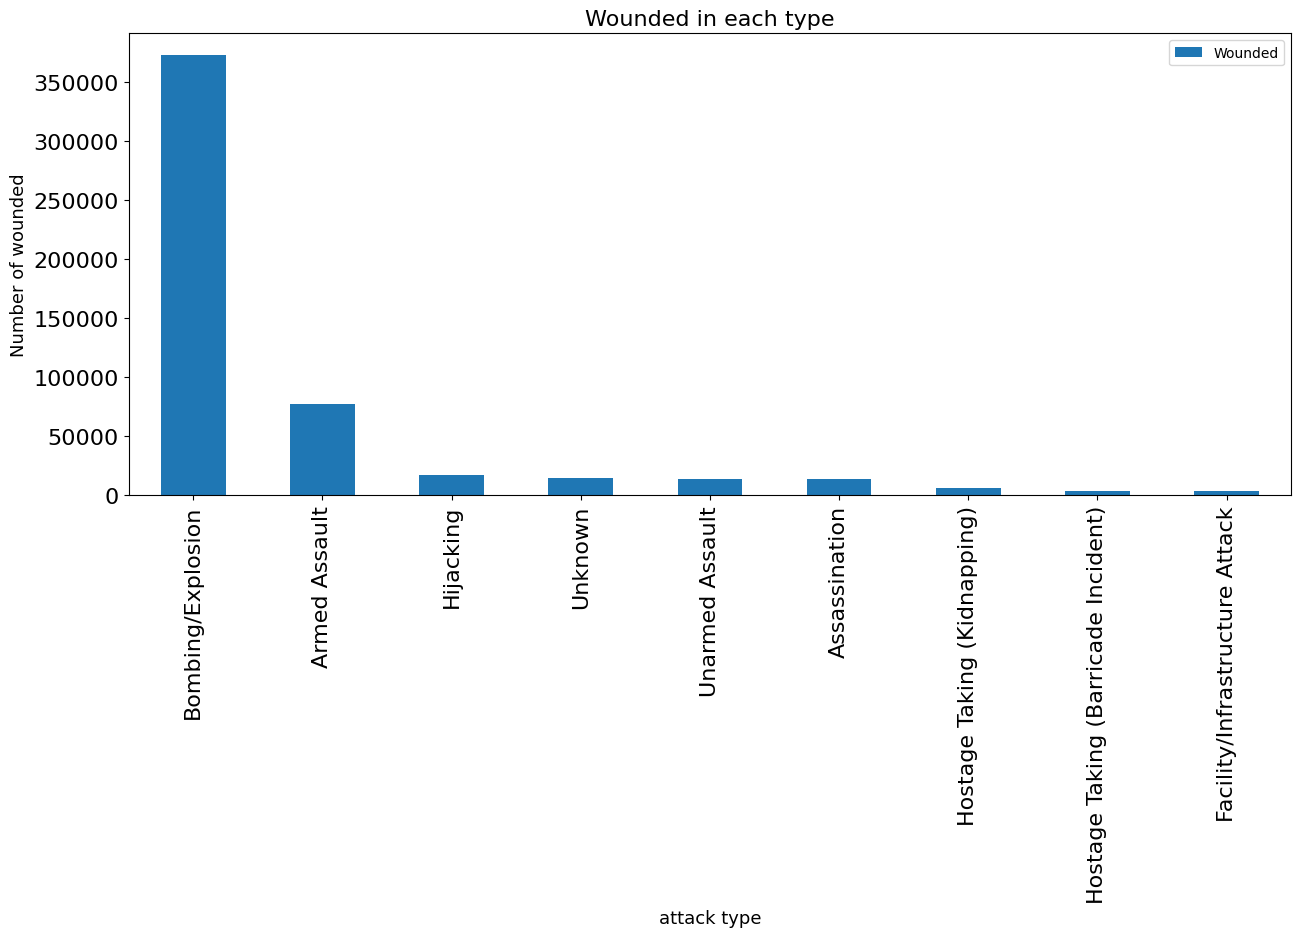

In [ ]:
aw.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Wounded in each type",fontsize=16)
plt.xlabel("attack type",fontsize=13)
plt.ylabel("Number of wounded",fontsize= 13)
plt.show()

# Number of attacks by each target type

In [ ]:
#Number of attacks by each target type
Target_type=df["targtype1_txt"].value_counts()
Target_type

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

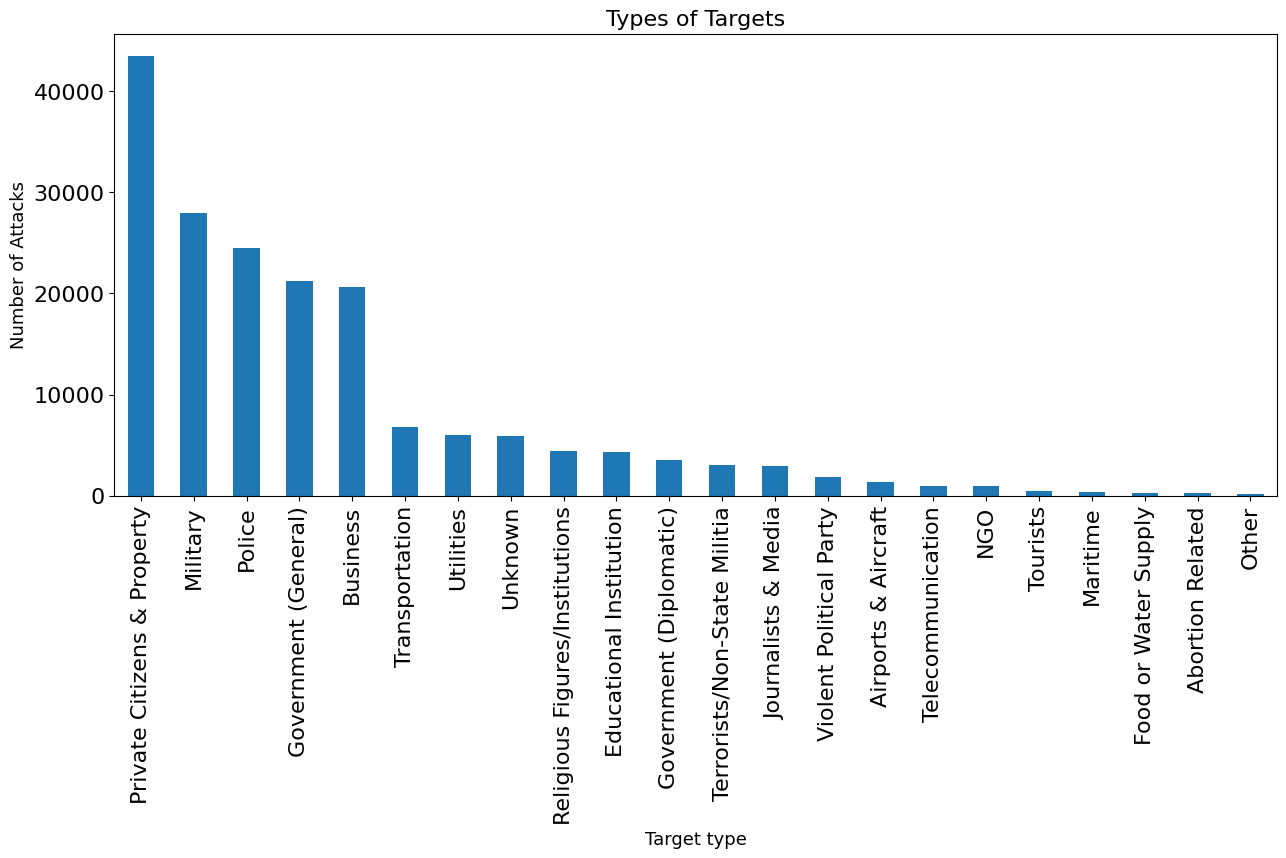

In [ ]:
Target_type.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Types of Targets",fontsize=16)
plt.xlabel("Target type",fontsize=13)
plt.ylabel("Number of Attacks",fontsize= 13)
plt.show()

# Casualties by each Types of Targets

In [ ]:
tc=df[["targtype1_txt","Casualty"]].groupby("targtype1_txt").sum().sort_values(by="Casualty",ascending=False)
tc

Casualty
targtype1_txt                           
Private Citizens & Property     319176.0
Military                        177085.0
Police                          118407.0
Business                         78018.0
Government (General)             67255.0
Transportation                   54595.0
Religious Figures/Institutions   37890.0
Terrorists/Non-State Militia     17311.0
Educational Institution          13972.0
Government (Diplomatic)          13398.0
Violent Political Party           8920.0
Unknown                           7888.0
Airports & Aircraft               7245.0
Journalists & Media               3297.0
Utilities                         3227.0
Maritime                          2099.0
Tourists                          2048.0
NGO                               1950.0
Telecommunication                  679.0
Other                              674.0
Food or Water Supply               547.0
Abortion Related                    56.0

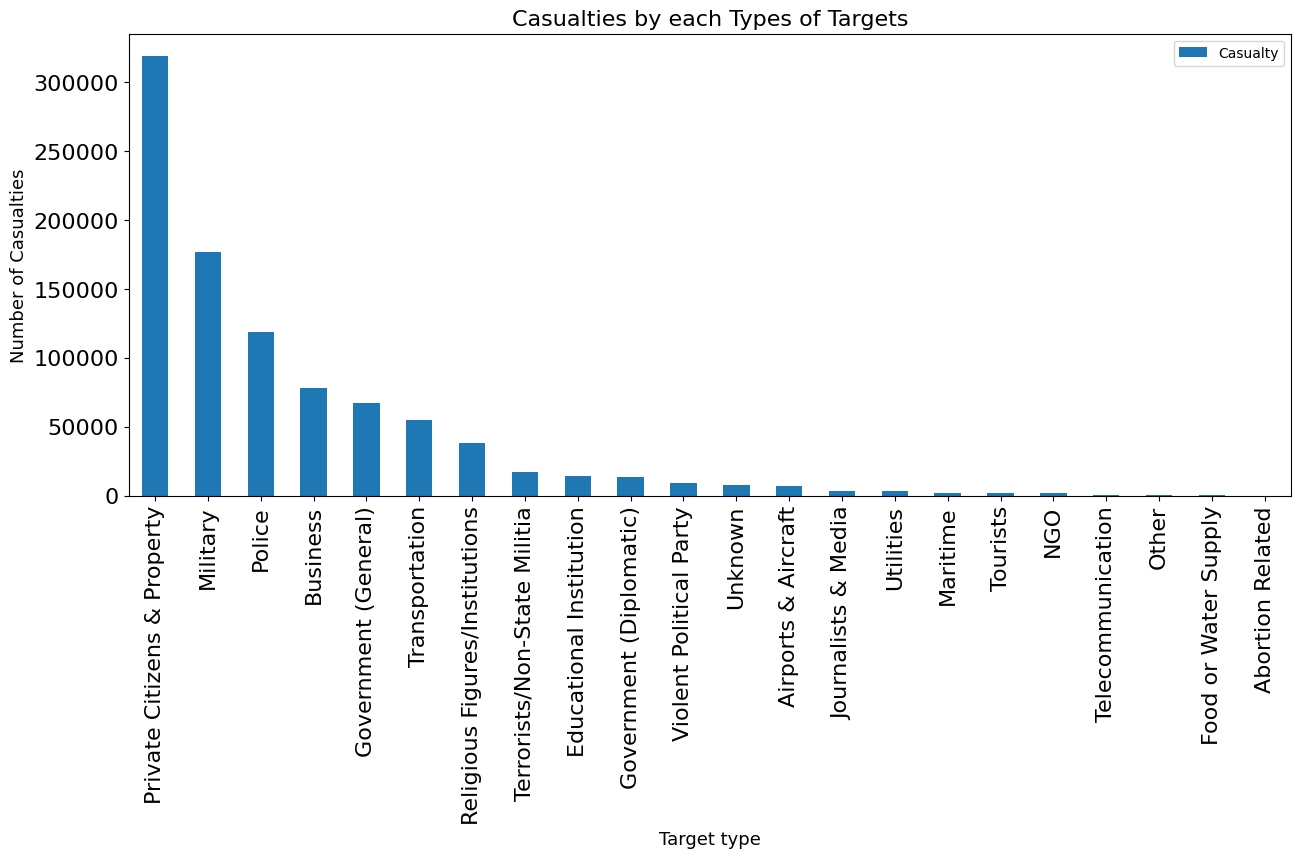

In [ ]:
tc.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Casualties by each Types of Targets",fontsize=16)
plt.xlabel("Target type",fontsize=13)
plt.ylabel("Number of Casualties",fontsize= 13)
plt.show()

# Killed by each Types of Targets

In [ ]:
tk=df[["targtype1_txt","killed"]].groupby("targtype1_txt").sum().sort_values(by="killed",ascending=False)
tk

killed
targtype1_txt                           
Private Citizens & Property     140504.0
Military                        106047.0
Police                           53704.0
Government (General)             26071.0
Business                         23487.0
Transportation                   13916.0
Religious Figures/Institutions   13413.0
Terrorists/Non-State Militia      9088.0
Unknown                           4329.0
Airports & Aircraft               3767.0
Educational Institution           3745.0
Violent Political Party           3617.0
Government (Diplomatic)           3039.0
Utilities                         1874.0
Journalists & Media               1501.0
Maritime                          1191.0
NGO                               1057.0
Tourists                           758.0
Food or Water Supply               313.0
Other                              255.0
Telecommunication                  182.0
Abortion Related                    10.0

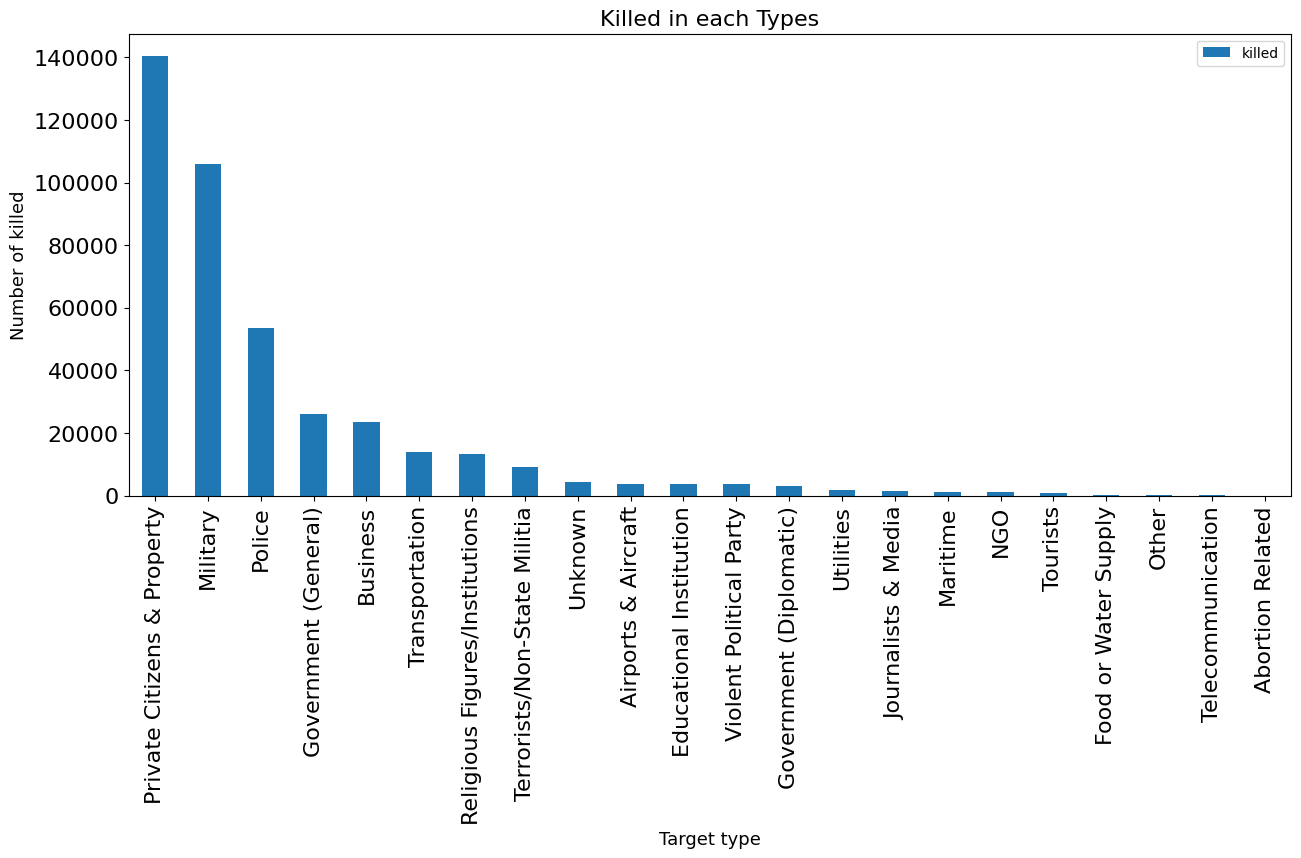

In [ ]:
tk.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Killed in each Types",fontsize=16)
plt.xlabel("Target type",fontsize=13)
plt.ylabel("Number of killed",fontsize= 13)
plt.show()

# Wounded by each Types of Targets

In [ ]:
tw=df[["targtype1_txt","Wounded"]].groupby("targtype1_txt").sum().sort_values(by="Wounded",ascending=False)
tw

Wounded
targtype1_txt                           
Private Citizens & Property     178672.0
Military                         71038.0
Police                           64703.0
Business                         54531.0
Government (General)             41184.0
Transportation                   40679.0
Religious Figures/Institutions   24477.0
Government (Diplomatic)          10359.0
Educational Institution          10227.0
Terrorists/Non-State Militia      8223.0
Violent Political Party           5303.0
Unknown                           3559.0
Airports & Aircraft               3478.0
Journalists & Media               1796.0
Utilities                         1353.0
Tourists                          1290.0
Maritime                           908.0
NGO                                893.0
Telecommunication                  497.0
Other                              419.0
Food or Water Supply               234.0
Abortion Related                    46.0

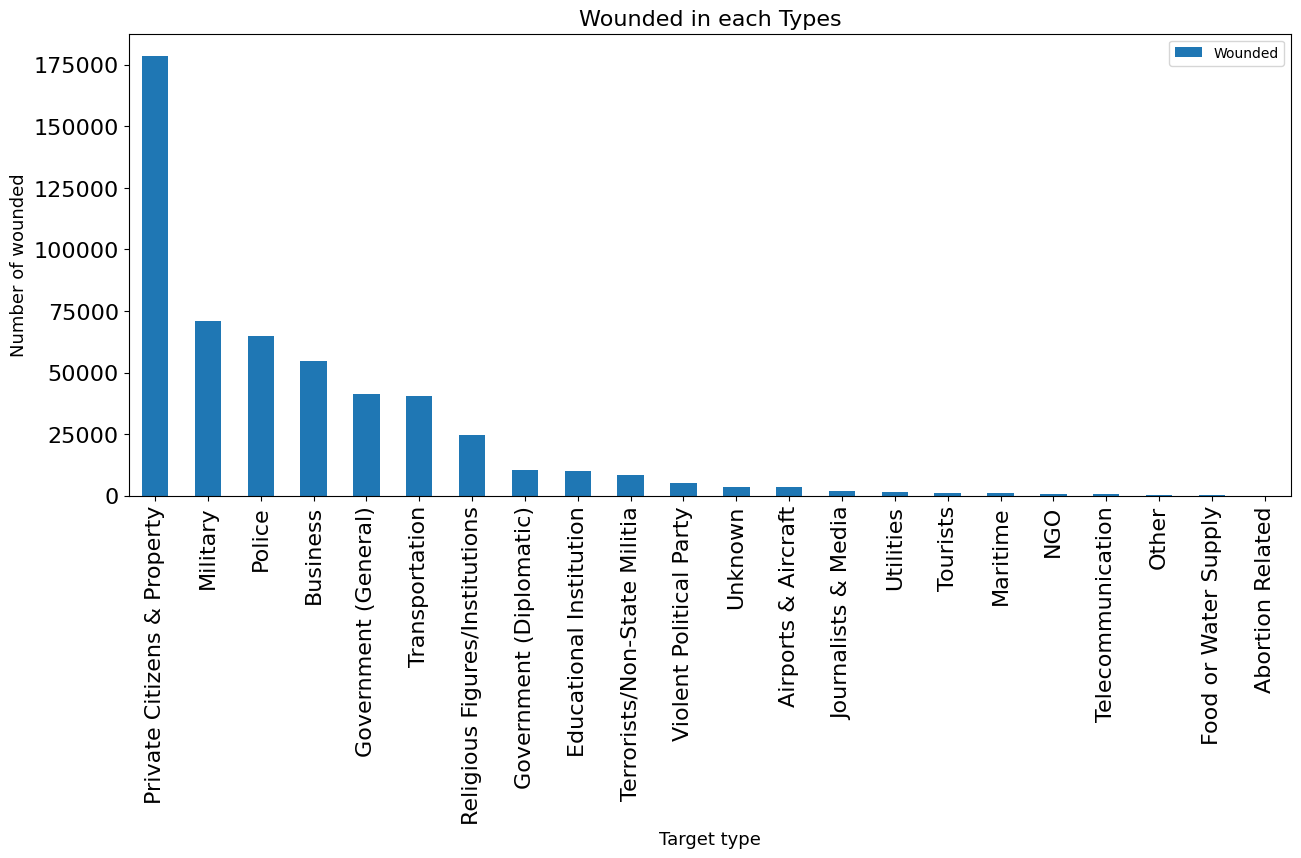

In [ ]:
tw.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Wounded in each Types",fontsize=16)
plt.xlabel("Target type",fontsize=13)
plt.ylabel("Number of wounded",fontsize= 13)
plt.show()

#Sorting by number of attacks

In [ ]:
#Sorting by number of attacks
gca=df[["Group Name","Country"]].value_counts().drop("Unknown").head(20)
gca

<ipython-input-45-67b57aea975a>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gca=df[["Group Name","Country"]].value_counts().drop("Unknown").head(20)


Group Name                                        Country       
Taliban                                           Afghanistan       7423
Islamic State of Iraq and the Levant (ISIL)       Iraq              4797
Shining Path (SL)                                 Peru              4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Al-Shabaab                                        Somalia           2867
New People's Army (NPA)                           Philippines       2770
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2468
Kurdistan Workers' Party (PKK)                    Turkey            2109
Boko Haram                                        Nigeria           2087
Basque Fatherland and Freedom (ETA)               Spain             1975
Communist Party of India - Maoist (CPI-Maoist)    India             1877
Liberation Tigers of Tamil Eelam (LTTE)           Sri Lanka

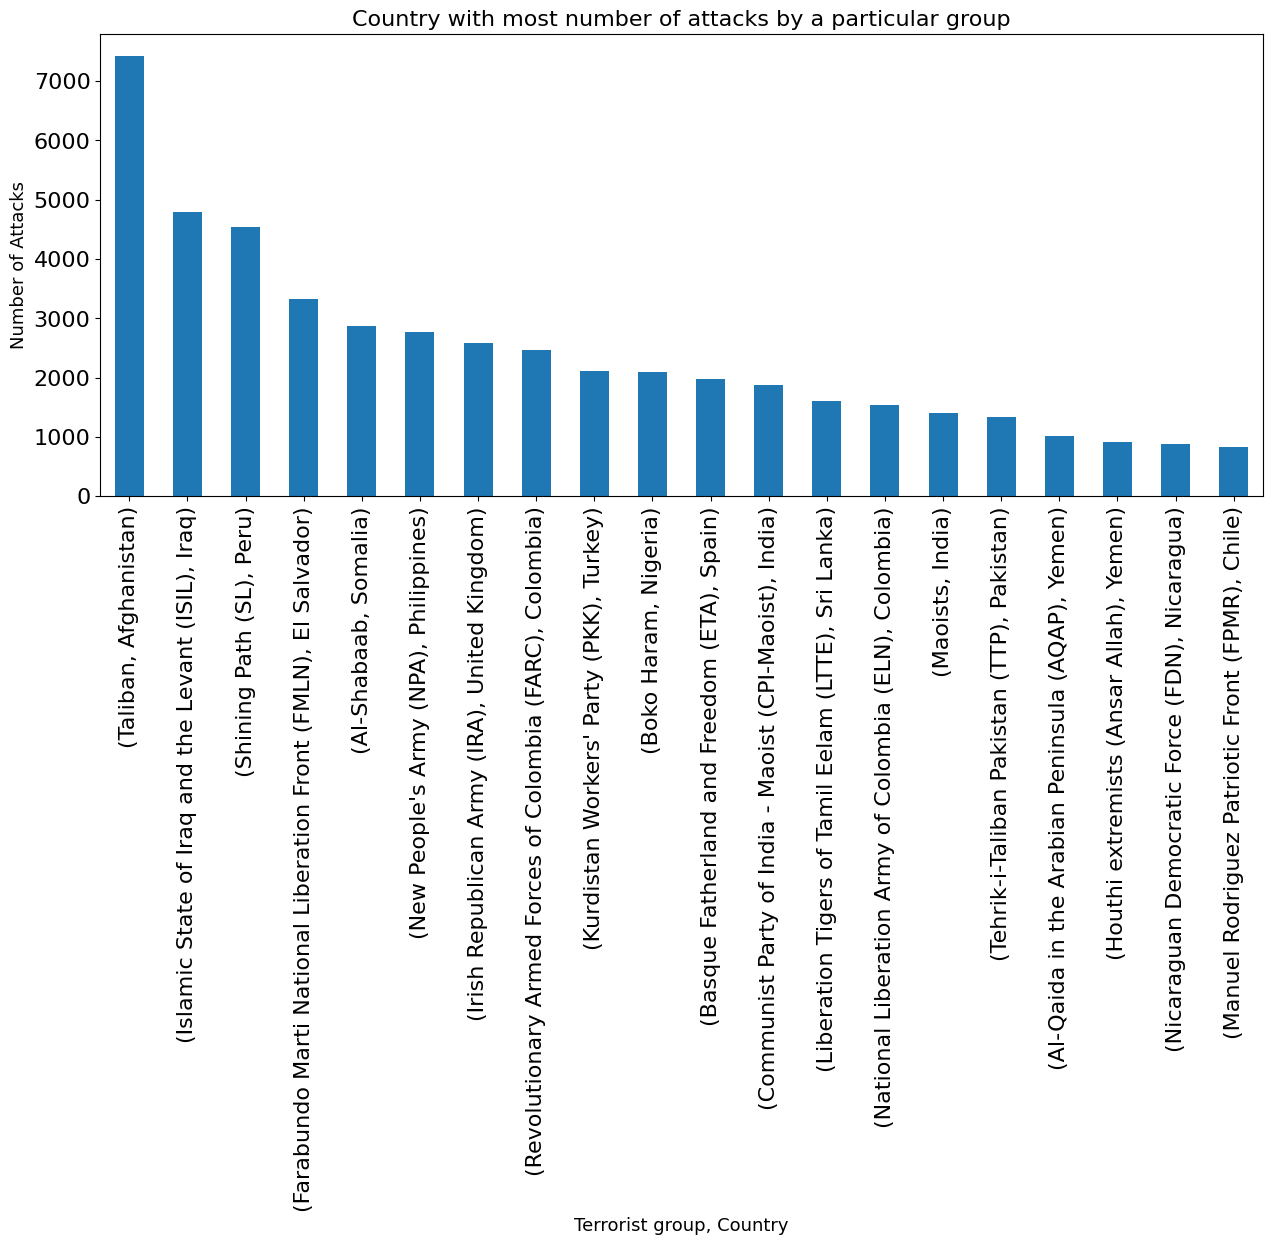

In [ ]:
gca.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Country with most number of attacks by a particular group",fontsize=16)
plt.xlabel("Terrorist group, Country",fontsize=13)
plt.ylabel("Number of Attacks",fontsize= 13)
plt.show()

#Country wise Casualties by a particular Group

In [ ]:
gcc=df[["Group Name","Country","Casualty"]].groupby(["Group Name","Country"]).sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)
gcc

<ipython-input-52-f3ef58280bcc>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcc=df[["Group Name","Country","Casualty"]].groupby(["Group Name","Country"]).sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)


Casualty
Group Name                                       Country                
Taliban                                          Afghanistan     57140.0
Islamic State of Iraq and the Levant (ISIL)      Iraq            54755.0
Boko Haram                                       Nigeria         24588.0
Liberation Tigers of Tamil Eelam (LTTE)          Sri Lanka       21919.0
Al-Qaida                                         United States   19494.0
Tehrik-i-Taliban Pakistan (TTP)                  Pakistan        15532.0
Shining Path (SL)                                Peru            14625.0
Al-Qaida in Iraq                                 Iraq            14348.0
Al-Shabaab                                       Somalia         14201.0
Farabundo Marti National Liberation Front (FMLN) El Salvador     12068.0

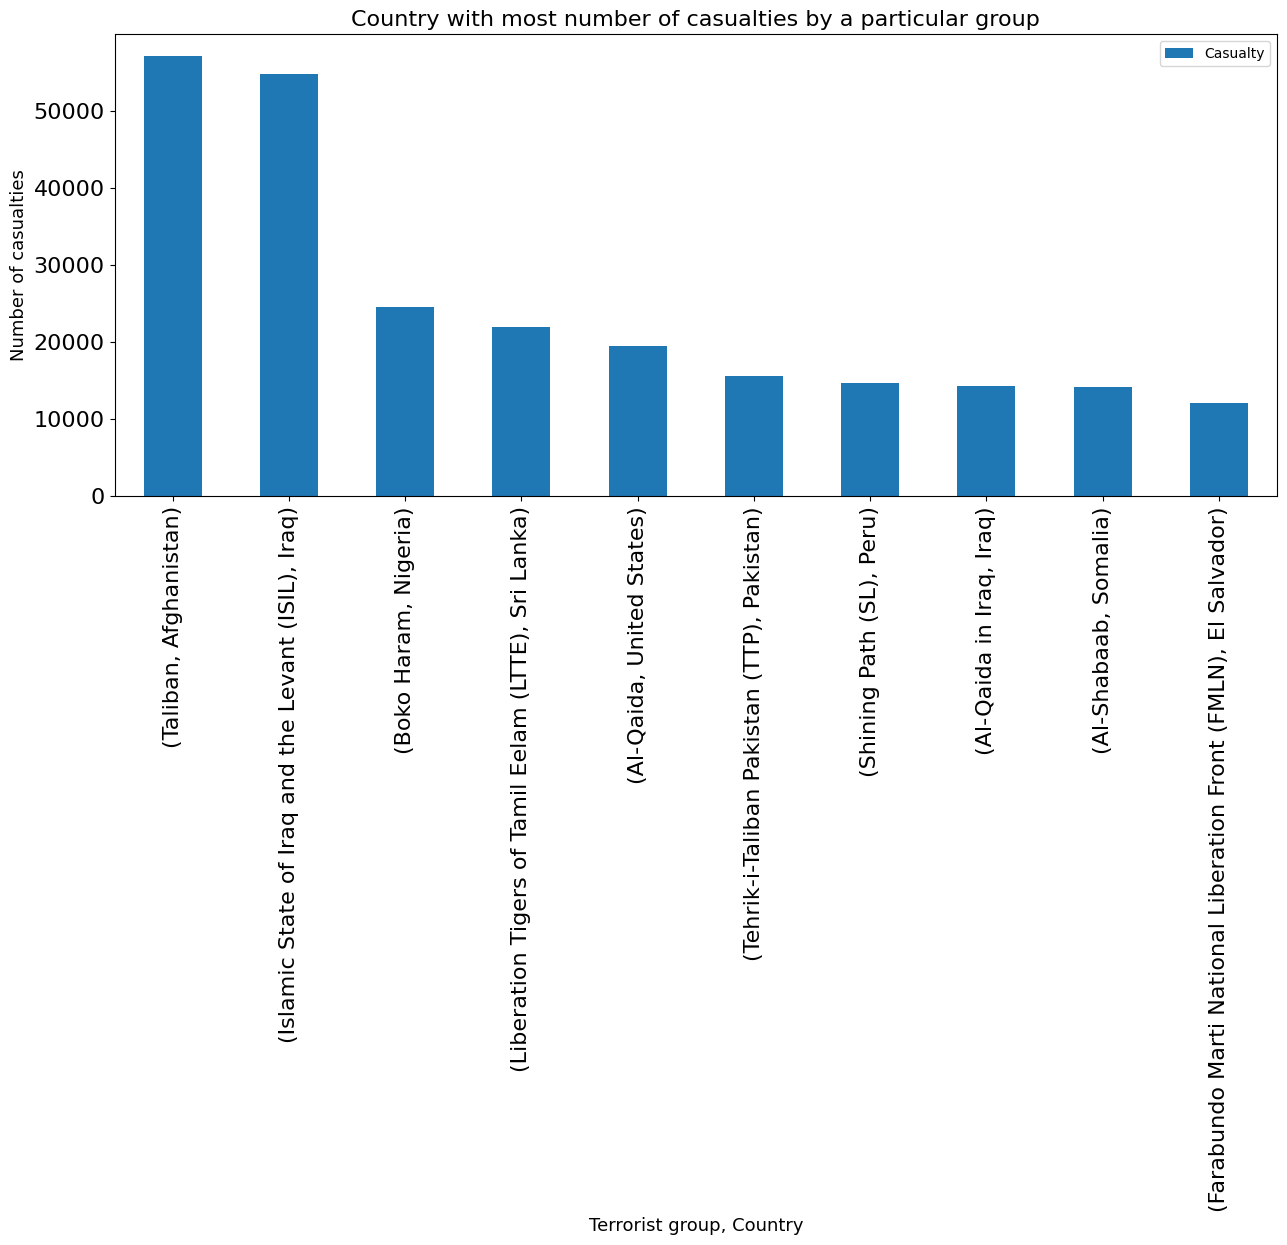

In [ ]:
gcc.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Country with most number of casualties by a particular group",fontsize=16)
plt.xlabel("Terrorist group, Country",fontsize=13)
plt.ylabel("Number of casualties",fontsize= 13)
plt.show()

#Country wise Killed by a particular Group

In [ ]:
gck=df[["Group Name","Country","killed"]].groupby(["Group Name","Country"]).sum().sort_values(by="killed",ascending=False).drop("Unknown").head(10)
gck

<ipython-input-54-3c9cceccb922>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gck=df[["Group Name","Country","killed"]].groupby(["Group Name","Country"]).sum().sort_values(by="killed",ascending=False).drop("Unknown").head(10)


killed
Group Name                                       Country             
Islamic State of Iraq and the Levant (ISIL)      Iraq         31058.0
Taliban                                          Afghanistan  29269.0
Boko Haram                                       Nigeria      16917.0
Shining Path (SL)                                Peru         11595.0
Liberation Tigers of Tamil Eelam (LTTE)          Sri Lanka    10928.0
Al-Shabaab                                       Somalia       8176.0
Farabundo Marti National Liberation Front (FMLN) El Salvador   8019.0
Islamic State of Iraq and the Levant (ISIL)      Syria         6883.0
Nicaraguan Democratic Force (FDN)                Nicaragua     6630.0
Tehrik-i-Taliban Pakistan (TTP)                  Pakistan      6014.0

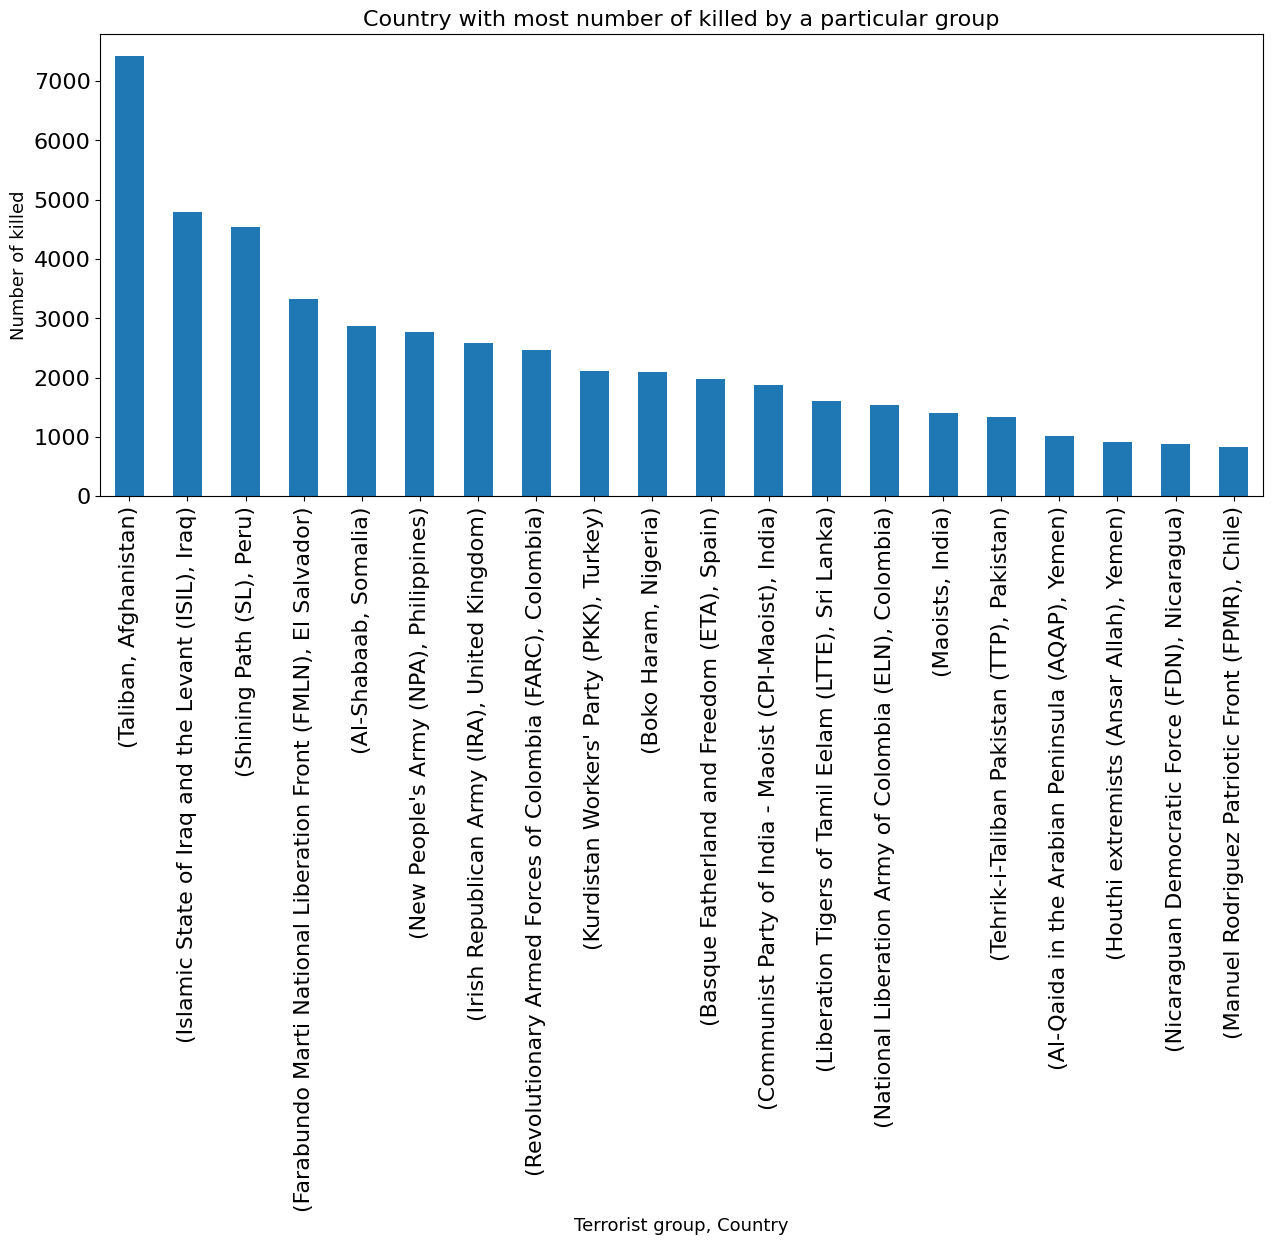

In [ ]:
gck.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Country with most number of killed by a particular group",fontsize=16)
plt.xlabel("Terrorist group, Country",fontsize=13)
plt.ylabel("Number of killed",fontsize= 13)
plt.show()

#Country wise Wounded by a particular Group

In [ ]:
gcw=df[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"]).sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)
gcw

<ipython-input-56-ad000675327c>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcw=df[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"]).sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)


Wounded
Group Name                                  Country               
Taliban                                     Afghanistan    27871.0
Islamic State of Iraq and the Levant (ISIL) Iraq           23697.0
Al-Qaida                                    United States  16493.0
Liberation Tigers of Tamil Eelam (LTTE)     Sri Lanka      10991.0
Al-Qaida in Iraq                            Iraq           10075.0
Tehrik-i-Taliban Pakistan (TTP)             Pakistan        9518.0
Boko Haram                                  Nigeria         7671.0
Al-Shabaab                                  Somalia         6025.0
Aum Shinri Kyo                              Japan           6003.0
Kurdistan Workers' Party (PKK)              Turkey          4795.0

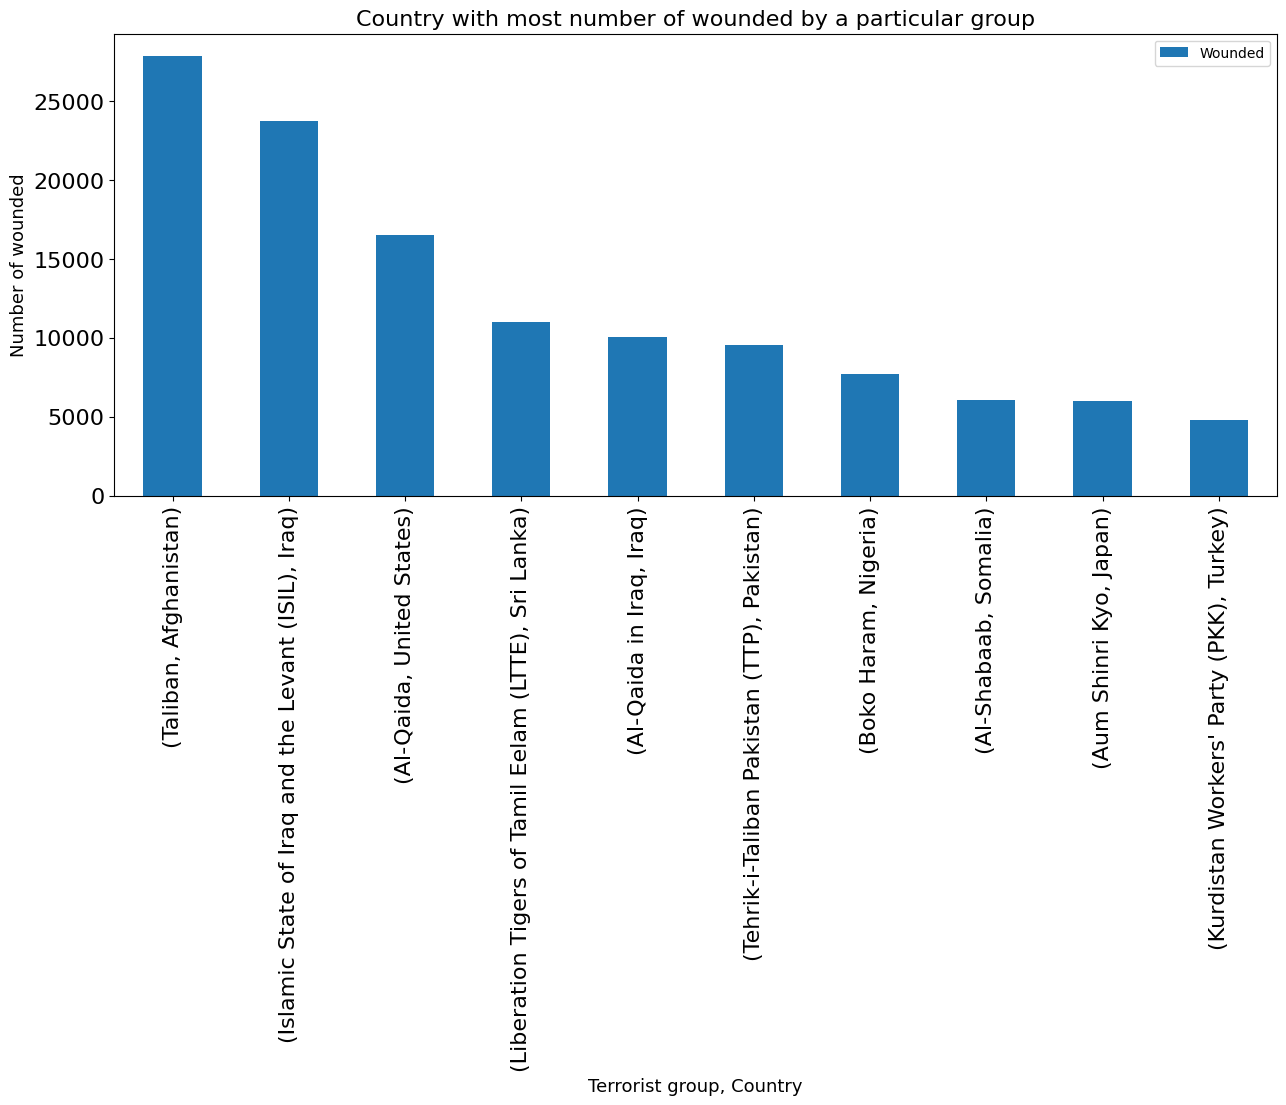

In [ ]:
gcw.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Country with most number of wounded by a particular group",fontsize=16)
plt.xlabel("Terrorist group, Country",fontsize=13)
plt.ylabel("Number of wounded",fontsize= 13)
plt.show()

In [ ]:
#Total casualties (killed+wounded) due to terrorist attacks
Casualty= df.loc[:,"Casualty"].sum()
print("Total number of casualties due to terrorist attacks from 1970 to 2017 across the world : ",Casualty)

Total number of casualties due to terrorist attacks from 1970 to 2017 across the world :  935737.0


In [ ]:
kill= df.loc[:,"killed"].sum()
print("Total number of killed due to terrorist attacks from 1970 to 2017 across the world : ",kill)

Total number of killed due to terrorist attacks from 1970 to 2017 across the world :  411868.0


In [ ]:
wound= df.loc[:,"Wounded"].sum()
print("Total number of Wounded due to terrorist attacks from 1970 to 2017 across the world : ",wound)

Total number of Wounded due to terrorist attacks from 1970 to 2017 across the world :  523869.0
